# CS:GO Professional Teams and Matches Analysis

# Introduction

Enjoying massive growth over the past few years, the global esports industry has a predicted 2021
revenue of over 1 billion dollars and a live-streaming audience of almost 730 million [3]. While
traditional athletic competitions such as football and basketball have rapidly expanded data collection of
team and player performance for improved matchup analysis, esports still lag behind. In physical sports,
the boundaries of data analysis have been expanded through increased measurements of participant
actions, with tools such as player-worn monitors and video replays. On the front of data availability,
esports are uniquely advantaged in that all game information, including player decisions, are recorded on
a central server.

Many multiplayer video games, such as Counter-Strike: Global Offensive (CSGO), log all game
events to a demo file. However, without proper frameworks offered by game developers to capture and
examine these events, the greatest limiting factor in esports analytics is “the lack of easily accessible and
clean esports data” (Xenopoulos, 2020).With all game information of professional tournaments,player decisions,player statistics and rankings etc available on https://www.hltv.org , CSGO represents an obvious stepping stone for growing
the field of esports analytics


The data used in this notebook was collected from https://www.hltv.org/. 

The Objective is to explore the data and derive conclusions based on Data Analysis.


# The Game

Counter-Strike Global Offensive is a game released in 2012, as a sequel to Counter-Strike Source (released in 2004), which is itself a sequel to the original Counter-Strike (released in 2000). The game's longevity is primarily caused by its competitive approach and vibrant professional scene. This longevity has shown in numbers recently, as CS:GO reached in March its all-time high concurrent weekly players (1.1M players), making it the most played game on Steam, 7 years after it was launched.

The game retains the same gameplay concepts since its first version, which include a Terrorist side (T) that is tasked to plant a bomb and have it detonate, and a Counter-Terrorist side (CT) that is tasked to defuse the bomb or prevent it from being planted. Both teams can also win a round by eliminating all players on the opposing team before the bomb is planted.

A standard game of Counter-Strike is a best of 30 rounds, the winning team being the first to win 16 rounds. The 30 rounds are played in two halves of 15 on each side of the map, with a round time limit of 1 minute 55 seconds, plus 40 seconds after the bomb is planted.

In case both teams draw at the 30th round on 15x15, 6 more rounds are added-on, which constitutes overtime. The overtime ends if a team wins 4 out of 6 rounds. If both teams win 3 rounds in overtime, another overtime of 6 rounds is played, and the process might repeat indefinitely until one team wins it.

There are 7 maps in the map pool that are available to be played competitively at any given time. Maps are removed and added frequently for updates and revamps, as to not make the game stale. Matches are normally played as a 'bo3' (Best of 3) maps, with less important matches played in a 'bo1' fashion and finals often played as 'bo5's.

There is a money management side to rounds in Counter-Strike. This side is detailed in the 'Economy DataFrame' topic.

# Preparation

Importing libraries and loading the tables.

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from os import listdir
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)


In [2]:

results_df = pd.read_csv('results.csv',low_memory=False)
picks_df = pd.read_csv('picks.csv',low_memory=False)
economy_df = pd.read_csv('economy.csv',low_memory=False)
players_df = pd.read_csv('players.csv',low_memory=False)

The heads and tails of each table are presented below. The data is split into 4 tables that store data related to:

 - <b>results_df:</b>   &nbsp;  map scores and team rankings

 - <b>picks_df:</b> &nbsp;  order of map picks and vetos in the map selection process.

 - <b>economy_df:</b>  &nbsp;  round start equipment value for all rounds played

 - <b>players_df:</b> &nbsp;   individual performances of players in each map.
 
Values stored in 'event_id' and 'match_id' columns are unique for each match and event and shared between dataframes, so these columns can be used as keys to merge data between dataframes.

It is necessary to note that the rows in 'results_df' and 'economy_df' store data for each map played in a match, while the rows in 'picks_df' and 'players_df' store data for the entire match.

In [3]:
results_df

date               team_1          team_2         _map  result_1  \
0      2020-03-18              Recon 5         TeamOne        Dust2         0   
1      2020-03-18              Recon 5         TeamOne      Inferno        13   
2      2020-03-18  New England Whalers        Station7      Inferno        12   
3      2020-03-18              Rugratz  Bad News Bears      Inferno         7   
4      2020-03-18              Rugratz  Bad News Bears      Vertigo         8   
...           ...                  ...             ...          ...       ...   
45768  2015-11-05                   G2      E-frag.net      Inferno        13   
45769  2015-11-05                   G2      E-frag.net        Dust2        16   
45770  2015-11-04                  CLG          Liquid      Inferno        16   
45771  2015-11-03                  NiP        Dignitas        Train        16   
45772  2015-11-03                  NiP            Envy  Cobblestone        16   

       result_2  map_winner  starting_ct  ct_1  t_2  t_1  ct_2  event_id  \
0            16           2            2     0    1    0    15      5151   
1            16           2            2     8    6    5    10      5151   
2            16           2            1     9    6    3    10      5243   
3            16           2            2     0    8    7     8      5151   
4            16           2            2     4    5    4    11      5151   
...         ...         ...          ...   ...  ...  ...   ...       ...   
45768        16           2            1     8    7    5     9      1970   
45769        13           1            1    10    5    6     8      1970   
45770        12           1            1     7    8    9     4      1934   
45771         4           1            2     4    1   12     3      1934   
45772         9           1            2     4    6   12     3      1934   

       match_id  rank_1  rank_2  map_wins_1  map_wins_2  match_winner  
0       2340454      62      63           0           2             2  
1       2340454      62      63           0           2             2  
2       2340461     140     118          12          16             2  
3       2340453      61      38           0           2             2  
4       2340453      61      38           0           2             2  
...         ...     ...     ...         ...         ...           ...  
45768   2299059       7      16           1           2             2  
45769   2299059       7      16           1           2             2  
45770   2299011      10      14          16          12             1  
45771   2299001       6      12          16           4             1  
45772   2299003       6       1          16           9             1  

[45773 rows x 19 columns]

In [4]:
picks_df

date               team_1          team_2  inverted_teams  \
0      2020-03-18              TeamOne         Recon 5               1   
1      2020-03-18              Rugratz  Bad News Bears               0   
2      2020-03-18  New England Whalers        Station7               0   
3      2020-03-17           Complexity           forZe               1   
4      2020-03-17          Singularity        Endpoint               0   
...           ...                  ...             ...             ...   
16030  2016-04-12              GODSENT   Natus Vincere               1   
16031  2016-04-12               Liquid     mousesports               0   
16032  2016-04-12           Luminosity           TYLOO               0   
16033  2016-04-12                 FaZe      Virtus.pro               1   
16034  2016-04-12          Tempo Storm            Envy               1   

       match_id  event_id best_of  system t1_removed_1 t1_removed_2  \
0       2340454      5151       3  123412      Vertigo        Train   
1       2340453      5151       3  123412        Dust2         Nuke   
2       2340461      5243       1  121212       Mirage        Dust2   
3       2340279      5226       3  123412      Inferno         Nuke   
4       2340456      5247       3  123412        Train       Mirage   
...         ...       ...     ...     ...          ...          ...   
16030   2302059      2099       1  121212        Dust2  Cobblestone   
16031   2302058      2099       1  121212      Inferno        Train   
16032   2302057      2099       1  121212        Dust2        Cache   
16033   2302063      2099       1  121212     Overpass  Cobblestone   
16034   2302064      2099       1  121212        Cache        Train   

      t1_removed_3 t2_removed_1 t2_removed_2 t2_removed_3 t1_picked_1  \
0              0.0         Nuke     Overpass          0.0       Dust2   
1              0.0       Mirage        Train          0.0     Vertigo   
2          Vertigo         Nuke        Train     Overpass         0.0   
3              0.0     Overpass      Vertigo          0.0       Dust2   
4              0.0         Nuke      Inferno          0.0    Overpass   
...            ...          ...          ...          ...         ...   
16030       Mirage        Cache      Inferno     Overpass         0.0   
16031       Mirage     Overpass  Cobblestone        Cache         0.0   
16032      Inferno        Train     Overpass  Cobblestone         0.0   
16033        Cache        Dust2      Inferno       Mirage         0.0   
16034      Inferno     Overpass       Mirage        Dust2         0.0   

      t2_picked_1    left_over  
0         Inferno       Mirage  
1         Inferno     Overpass  
2             0.0      Inferno  
3           Train       Mirage  
4         Vertigo        Dust2  
...           ...          ...  
16030         0.0        Train  
16031         0.0        Dust2  
16032         0.0       Mirage  
16033         0.0        Train  
16034         0.0  Cobblestone  

[16035 rows x 17 columns]

In [5]:
economy_df

date  match_id  event_id         team_1         team_2 best_of  \
0      2020-03-01   2339402      4901             G2  Natus Vincere       5   
1      2020-03-01   2339402      4901             G2  Natus Vincere       5   
2      2020-03-01   2339402      4901             G2  Natus Vincere       5   
3      2020-02-29   2339401      4901  Natus Vincere       Astralis       3   
4      2020-02-29   2339401      4901  Natus Vincere       Astralis       3   
...           ...       ...       ...            ...            ...     ...   
43229  2017-04-04   2309263      2683           FaZe    HellRaisers       1   
43230  2017-04-04   2309262      2683       Astralis            CLG       1   
43231  2017-04-04   2309261      2683             SK          TYLOO       1   
43232  2017-04-04   2309260      2683     Virtus.pro    MVP Project       1   
43233  2017-04-04   2309259      2683          North      Immortals       1   

              _map t1_start t2_start    1_t1     2_t1     3_t1     4_t1  \
0             Nuke        t       ct  4350.0   1100.0  22100.0   9350.0   
1            Dust2       ct        t  3900.0   7400.0  23250.0  28500.0   
2           Mirage        t       ct  4150.0  14300.0   2000.0  24800.0   
3            Dust2        t       ct  4150.0  18050.0  21000.0  25850.0   
4             Nuke       ct        t  4200.0  10000.0  22000.0  24500.0   
...            ...      ...      ...     ...      ...      ...      ...   
43229        Cache        t       ct  4250.0   7400.0  17200.0  18500.0   
43230        Train        t       ct  4250.0   1600.0  24250.0  17400.0   
43231       Mirage       ct        t  4350.0   7650.0  20000.0  21500.0   
43232       Mirage        t       ct  4150.0  11800.0   1200.0  22950.0   
43233  Cobblestone        t       ct  4100.0  17700.0  18950.0  13200.0   

          5_t1     6_t1     7_t1     8_t1     9_t1    10_t1    11_t1    12_t1  \
0      25750.0  10400.0  24600.0   8150.0  26700.0  23400.0   4300.0  25900.0   
1      31900.0  31700.0  18950.0  30200.0  28650.0  30350.0  30150.0  11100.0   
2       9000.0  23150.0  21850.0  23700.0  10450.0  26250.0   8800.0  24950.0   
3      25000.0  25000.0  27250.0  26150.0  26300.0  27850.0  26750.0  27450.0   
4      27550.0  29350.0  31950.0  31850.0  31750.0  32850.0  32150.0  31750.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
43229  26750.0  27450.0  26950.0  26350.0  26350.0  25950.0  19950.0   3000.0   
43230  22050.0   6600.0  25650.0  25650.0  26350.0  26250.0  26350.0  27150.0   
43231  29150.0  26900.0   8750.0  20700.0   5350.0  28400.0  30700.0  33100.0   
43232  25750.0  26850.0  27850.0  26150.0  26650.0  23700.0  24800.0  24500.0   
43233  24000.0  20550.0  14500.0  20300.0  23100.0  21450.0  19850.0  24300.0   

         13_t1    14_t1    15_t1   16_t1    17_t1    18_t1    19_t1    20_t1  \
0      11950.0  24850.0  21900.0  4150.0  10650.0  27300.0  27000.0  30950.0   
1      23700.0   8550.0  26350.0  4050.0   9400.0  21900.0  12700.0  11300.0   
2      12100.0  24350.0  18250.0  4300.0  19400.0   8900.0      NaN      NaN   
3      27850.0  18300.0  27850.0  4000.0  21100.0   9100.0   3100.0  22100.0   
4      31850.0  33050.0  33150.0  4250.0   3000.0  21150.0  11750.0  28050.0   
...        ...      ...      ...     ...      ...      ...      ...      ...   
43229  25950.0  26350.0  24050.0  4250.0   7400.0   4950.0  22850.0   5900.0   
43230  26350.0  26150.0  26200.0  4300.0  21350.0  23850.0  25550.0  30500.0   
43231   6200.0  26450.0  25050.0  4100.0   7550.0   1500.0  25800.0  24900.0   
43232  26650.0  24700.0  25900.0  4500.0  19850.0  20300.0  25800.0  31450.0   
43233  22550.0  26750.0  28800.0  4250.0  19300.0  24500.0  33000.0      NaN   

         21_t1    22_t1    23_t1    24_t1    25_t1    26_t1    27_t1    28_t1  \
0          NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       3100.0  26250.0  21300.0  23950.0  27450.0  27550.0  28050.

In [6]:
players_df

date player_name           team       opponent        country  \
0       2020-02-26      Brehze  Evil Geniuses         Liquid  United States   
1       2020-02-26        CeRq  Evil Geniuses         Liquid       Bulgaria   
2       2020-02-26       EliGE         Liquid  Evil Geniuses  United States   
3       2020-02-26       Ethan  Evil Geniuses         Liquid  United States   
4       2020-02-26         NAF         Liquid  Evil Geniuses         Canada   
...            ...         ...            ...            ...            ...   
383312  2015-10-07      kIMERA        ExAequo      RIP Fonty          Italy   
383313  2015-10-07   morphiw0w        ExAequo      RIP Fonty          Italy   
383314  2015-10-07     overfly      RIP Fonty        ExAequo          Italy   
383315  2015-10-07     simozor      RIP Fonty        ExAequo          Italy   
383316  2015-10-07       xullE      RIP Fonty        ExAequo          Italy   

        player_id  match_id  event_id                              event_name  \
0            9136   2339385      4901                       IEM Katowice 2020   
1           11219   2339385      4901                       IEM Katowice 2020   
2            8738   2339385      4901                       IEM Katowice 2020   
3           10671   2339385      4901                       IEM Katowice 2020   
4            8520   2339385      4901                       IEM Katowice 2020   
...           ...       ...       ...                                     ...   
383312       7607   2298497      1957  Milan Games Week 2015 League by FACEIT   
383313       9752   2298497      1957  Milan Games Week 2015 League by FACEIT   
383314       7698   2298497      1957  Milan Games Week 2015 League by FACEIT   
383315       9753   2298497      1957  Milan Games Week 2015 League by FACEIT   
383316       9754   2298497      1957  Milan Games Week 2015 League by FACEIT   

        best_of        map_1  map_2    map_3  kills  assists  deaths  hs  \
0             3     Overpass   Nuke  Inferno     57       14      61  29   
1             3     Overpass   Nuke  Inferno     54       10      54  18   
2             3     Overpass   Nuke  Inferno     55       10      51  28   
3             3     Overpass   Nuke  Inferno     43        5      54  18   
4             3     Overpass   Nuke  Inferno     52       22      46  23   
...         ...          ...    ...      ...    ...      ...     ...  ..   
383312        2  Cobblestone  Cache      NaN     30        2      17   8   
383313        2  Cobblestone  Cache      NaN     26        6      22   9   
383314        2  Cobblestone  Cache      NaN     28        4      34   8   
383315        2  Cobblestone  Cache      NaN     18        7      36   9   
383316        2  Cobblestone  Cache      NaN     14        2      35   7   

        flash_assists  kast  kddiff   adr  fkdiff  rating  m1_kills  \
0                 0.0  71.1      -4  79.9       0    1.04        11   
1                 4.0  65.1       0  71.7       2    0.98        11   
2                 1.0  67.5       4  77.9       1    1.08        15   
3                 2.0  65.1     -11  58.7      -4    0.83        11   
4                 9.0  77.1       6  75.9      -1    1.08        10   
...               ...   ...     ...   ...     ...     ...       ...   
383312            NaN   NaN      13   NaN       2    1.29        15   
383313            NaN   NaN       4   NaN       0    1.00        14   
383314            NaN   NaN      -6   NaN       2    0.81         8   
383315            NaN   NaN     -18   NaN      -4    0.50         5   
383316            NaN   NaN     -21   NaN       0    0.44         5   

        m1_assists  m1_deaths  m1_hs  m1_flash_assists  m1_kast  m1_kddiff  \
0                3         18      5               0.0     65.2         -7   
1                2         17      4               2.0     60.9         -6   
2                3         12      9               0.0     69.6          3   
3             

The data collected has data from all professional CS:GO matches, including matches from relatively unknown teams. For that reason, we will be limiting the datasets to the matches played between the top 30 teams in the HLTV rankings.

In [7]:
min_rank = 30
results_df = results_df[(results_df.rank_1<min_rank)&(results_df.rank_2<min_rank)]

picks_df     = picks_df  [picks_df  .match_id.isin(results_df.match_id.unique())]
economy_df   = economy_df[economy_df.match_id.isin(results_df.match_id.unique())]
players_df   = players_df[players_df.match_id.isin(results_df.match_id.unique())]

# Results DataFrame

## Distribution of scores

In [8]:
winner_1 = results_df[results_df.result_1>=results_df.result_2].result_1.values
loser_1  = results_df[results_df.result_1>=results_df.result_2].result_2.values

winner_2 = results_df[results_df.result_1<results_df.result_2].result_2.values
loser_2  = results_df[results_df.result_1<results_df.result_2].result_1.values

winner = np.concatenate((winner_1,winner_2))
loser = np.concatenate((loser_1,loser_2))
scores_df = pd.DataFrame(np.vstack((winner,loser)).T,columns=['winner','loser'])

In [9]:
gb = scores_df.groupby(by=['winner','loser'])['winner'].count()/scores_df.shape[0]
overtime_percentage = str(round(gb[gb.index.get_level_values(0)!=16].sum()*100,1))+'%'

gb = round(gb[gb>10**-3]*100,1)

index_plot = np.array(gb.index.get_level_values(0).astype('str'))+'-'+np.array(
    gb.index.get_level_values(1).astype('str'))

fig = go.Figure()
fig.add_trace(go.Scatter(x=index_plot,y=gb.values, name='results'))
fig.update_layout(xaxis_type='category',title='Scores distribution',xaxis_title='Score',yaxis_title='Percentage of matches (%)')

In [10]:
overtime_percentage

'9.7%'

We can see that on regular time (disregarding overtime), the most common score is 16-14 (achieved in 10.7% of the matches) and the rarest score is 16-0 (achieved in only 0.2% of the matches), with intermediate scores falling somewhere in between. 

9.7% of the matches go to overtime.

The results may differ if we consider matches played by non top-tier teams.

## Most CT sided map

There has long been a dispute in CS:GO to determine the most CT-sided maps, and always present discussion if having a heavily one-sided map is a desirable outcome. Here we determine this characteristic by computing the average scores obtained in each side of the map and then comparing both sides.

In [11]:
ct_1 = results_df[['date','_map','ct_1']].rename(columns={'ct_1':'ct'})
ct_2 = results_df[['date','_map','ct_2']].rename(columns={'ct_2':'ct'})
ct = pd.concat((ct_1,ct_2))

In [12]:
t_1 = results_df[['date','_map','t_1']].rename(columns={'t_1':'t'})
t_2 = results_df[['date','_map','t_2']].rename(columns={'t_2':'t'})
t = pd.concat((t_1,t_2))

In [13]:
t = t.sort_values('date')
ct = ct.sort_values('date')

In [14]:
maps = ['Cache','Cobblestone','Dust2','Inferno','Mirage','Nuke','Overpass','Train','Vertigo']

In [15]:
series_t, series_ct, how_ct = {},{},{}
for i, key in enumerate(maps):
    t_map = t[t._map == maps[i]]
    ct_map = ct[ct._map == maps[i]]
    y_t = t_map.t.rolling(min_periods = 20, window= 200, center=True).sum().values
    y_ct = ct_map.ct.rolling(min_periods = 20, window= 200, center=True).sum().values
    
    series_t[key] = pd.Series(data=y_t,index=t_map.date)
    series_ct[key] = pd.Series(data=y_ct,index=ct_map.date)
    
    how_ct[key] = series_ct[key]/(series_ct[key]+series_t[key])//0.001/10

In [16]:
def add_trace(_map):
    fig.add_trace(go.Scatter(x=how_ct[_map].index, y=how_ct[_map].values, name=_map))

In [17]:
fig = go.Figure()
for _map in maps:
    add_trace(_map)
fig.add_trace(go.Scatter(x=['2015-11-01', '2020-03-12'], y=[50,50],
                         mode='lines',line=dict(color='grey'),showlegend=False))
fig.update_layout(title='Distribution of rounds between CT and T sides',
                  yaxis_title='Percentage of round won on the CT-side (%)')
fig.show()

There are long stretches without data for a map in the graph. This happens because maps are added and removed from the map pool constantly.

<b>Nuke</b> and <b>Train</b> oscilatte as being the most CT-sided maps, having around 57% of the rounds won on the CT-side, while
<b>Dust2</b> and <b>Cache</b> are historically the most T-sided maps.

It is interesting to note that <b>Inferno</b> was known for being a heavily CT-sided map prior to 2016, which was one of the reasons to update it. Since its update, <b>Inferno</b> has actually been the most balanced map in this aspect.



## Maps played per period

About the maps:
 - <b>Mirage</b>, <b>Train</b>, <b>Inferno</b> and <b>Overpass</b> are the maps from which we have the most data available. They are also the maps present on the map pool for the longest time;

 - <b>Cache</b>, <b>Cobblestone</b> and <b>Dust2</b> have been played less, but have also been outside the map pool for the longest periods:

 - <b>Nuke</b> is historically the least played map, even though it has been present in the map pool for a long time. The only explanation for this stems from the teams' unfamiliarity with the map;

 - <b>Vertigo</b> has limited data available as it was the most recently added map in the map pool.

In [18]:
print('Total number of matches played on the map:')
results_df.groupby('_map').date.count()

Total number of matches played on the map:


_map
Cache           900
Cobblestone     898
Default           2
Dust2           892
Inferno        1325
Mirage         1617
Nuke            750
Overpass       1150
Train          1384
Vertigo          99
Name: date, dtype: int64

<a id="4" ></a>
### Which map was preferred more ?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mirage         1617
Train          1384
Inferno        1325
Overpass       1150
Cache           900
Cobblestone     898
Dust2           892
Nuke            750
Vertigo          99
Default           2
Name: _map, dtype: int64


<IPython.core.display.Javascript object>

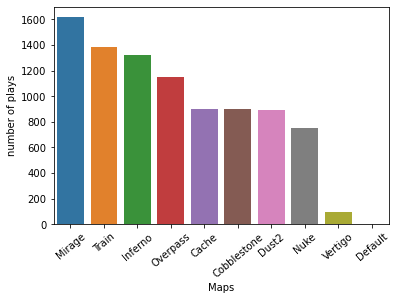

In [19]:
sns.barplot(x=results_df._map.value_counts().index,y=results_df._map.value_counts().values)
plt.xticks(rotation=40)
plt.xlabel("Maps")
plt.ylabel("number of plays")
print(results_df._map.value_counts())
plt.show()

### Which map was preferred more in which event?

***The 10 most played events***

In [82]:
players_df[['event_id','event_name']].groupby(['event_id','event_name']).size().nlargest(10)



event_id  event_name                      
2124      ESL Pro League Season 3             1840
2638      ESL Pro League Season 5 Europe      1580
2866      ESL Pro League Season 6 Europe      1520
2208      ECS Season 1                        1457
2369      ESL Pro League Season 4 - Europe    1430
3374      ESL Pro League Season 8 Europe      1420
3361      ESL Pro League Season 7 Europe      1400
2135      ELEAGUE Season 1                    1120
2495      ECS Season 2 Europe                  900
3666      StarSeries i-League Season 5         900
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

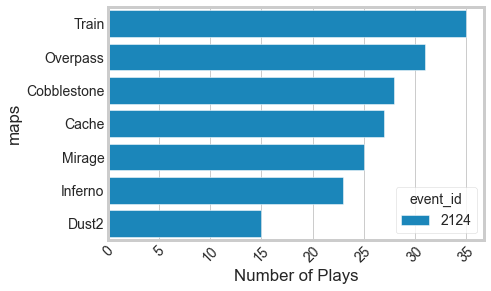

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

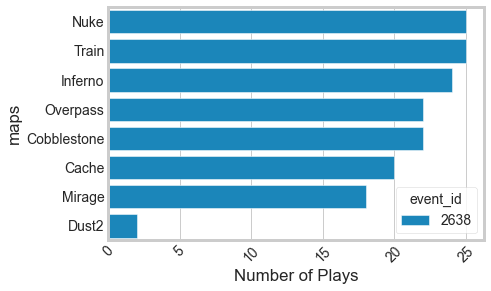

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

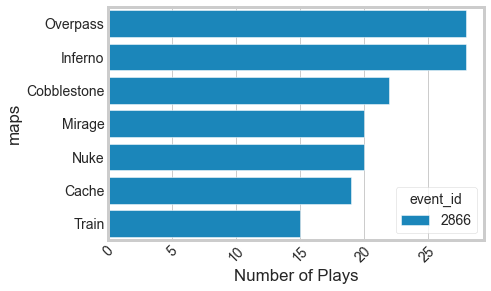

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

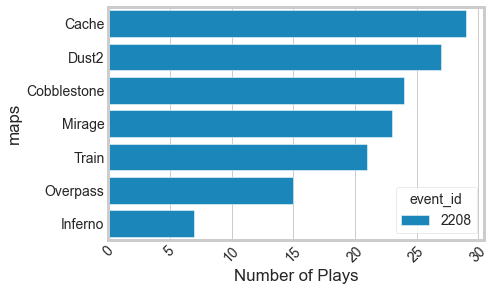

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

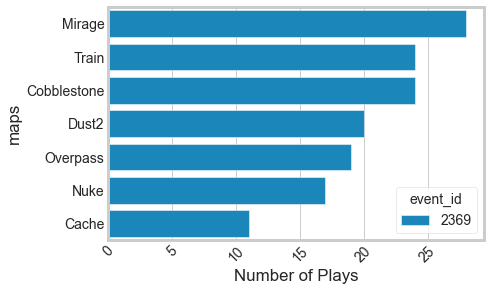

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

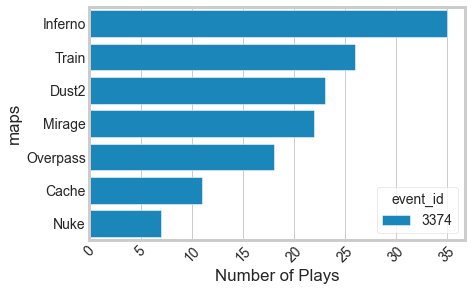

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

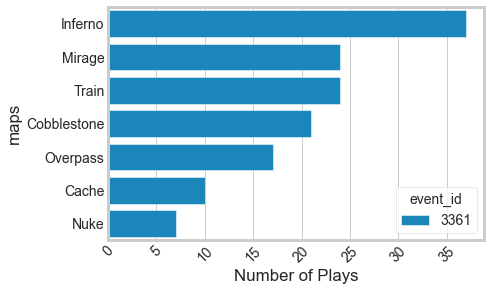

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

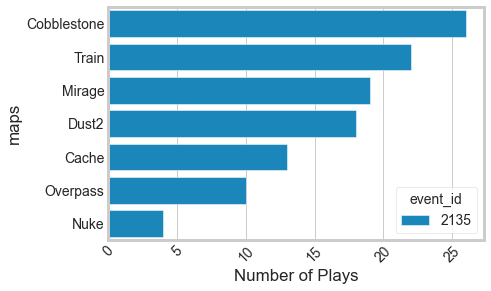

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

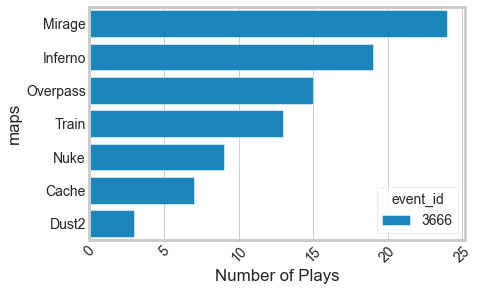

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

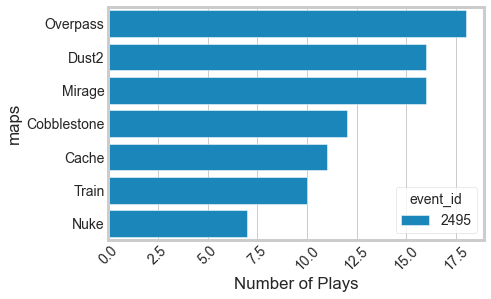

In [84]:
events=list(results_df.event_id.unique())
#There are lots of events so ı choose the 10 most played events
events_10={"event_id":results_df["event_id"].value_counts().index,"sum":results_df["event_id"].value_counts()}
events_10=pd.DataFrame(events_10)
events=events_10.event_id.iloc[:10].values
maps=pd.DataFrame()
for i in events:
    maps=pd.DataFrame({"event_id":i,"maps":results_df[results_df.event_id==i]["_map"].value_counts().index,"sum":results_df[results_df.event_id==i]["_map"].value_counts().values})
    sns.barplot(x="sum",y="maps",hue="event_id",data=maps)
    plt.xticks(rotation=45)
    plt.xlabel("Number of Plays")
    plt.show()
    


In CS:GO, the most reputable tournaments are the Majors. These tournaments are normally played twice a year and have a prize pool of $1,000,000. More information about the subject can be seen here: https://liquipedia.net/counterstrike/Majors

For the next step, we are going to discretize the 'date' column in a dataframe into a 'time_period' column. This new column will refer to the most recently played major tournament.

As an example, following this binning technique, we are currently on the Berlin 2019 period, as that was the most recently played tournament.

In [20]:
majors = [{'tournament':'01. Cluj-Napoca 2015','start_date':'2015-10-28'},
          {'tournament':'02. Columbus 2016','start_date':'2016-03-29'},
          {'tournament':'03. Cologne 2016','start_date':'2016-07-05'},
          {'tournament':'04. Atlanta 2017','start_date':'2017-01-22'},
          {'tournament':'05. Krakow 2017','start_date':'2017-07-16'},
          {'tournament':'06. Boston 2018','start_date':'2018-01-26'},
          {'tournament':'07. London 2018','start_date':'2018-09-20'},
          {'tournament':'08. Katowice 2019','start_date':'2019-02-28'},
          {'tournament':'09. Berlin 2019','start_date':'2019-09-05'}]

In [21]:
def create_col_time_period(df):
    df['time_period'] = ''
    
    for major_start in majors:
        df.loc[(df['date']>=major_start['start_date']),'time_period'] = major_start['tournament']
    
    return df

In [22]:
results_df = create_col_time_period(results_df)
economy_df = create_col_time_period(economy_df)
picks_df = create_col_time_period(picks_df)
players_df = players_df.merge(results_df[['match_id','time_period']],'left',on='match_id')

In [23]:
results_df_team_1 = results_df[['time_period','team_1','_map','ct_1','t_2','ct_2','t_1']
                      ].rename(columns={'team_1':'team'})
results_df_team_2 = results_df[['time_period','team_2','_map','ct_1','t_2','ct_2','t_1']
                      ].rename(columns={'team_2':'team'})
results_df_teams = pd.concat((results_df_team_1,results_df_team_2))[['time_period','team','_map']]

In [24]:
gb = results_df_teams.groupby(['time_period','_map']).team.count()
gb_text = round(gb*100/gb.groupby('time_period').sum(),1).reset_index().rename(columns={'team':'percentage'})
gb_text.percentage = gb_text.percentage.astype(str)+'%'
gb = gb.reset_index()

In [25]:
fig = go.Figure()
for _map in maps:
    fig.add_bar(name=_map,x=gb[gb._map==_map].time_period,y=gb[gb._map==_map].team,
                text=gb_text[gb_text._map==_map].percentage,textposition='inside')

fig.update_layout(barmode='stack',legend=dict(traceorder='normal'),yaxis_title='Number of maps played',font=dict(size=10))
fig.show()

As pointed out previously, <b>Nuke</b> is historically the least popular map in the pool. This has been changing recently, as teams that used to permaban the map have moved on to banning maps like Vertigo.

<b>Vertigo</b>, as the newest and most unconventional map, is also the most unpopular map, probably due to the many changes it has had in its short competitive term.

The period between Columbus and Cologne 2016 has the least amount of maps played and is also the shortest (under 4 months), while the period between Boston and London 2018 has the highest amount of maps played and is also the longest (over 7 months).

## Best teams on each map

In this section, let's search for the best teams in each map. The victory percentage for the teams on each map is readily available in many e-sports sites like hltv.org, so it would be pointless to present the information the same way. For this reason, instead of pointing out the percentages, we are going to rank the best teams on each map and each side (CT and T) for every time period.

In [26]:
results_df_team_1_ct = results_df_team_1.rename(columns={'ct_1':'ct_team','t_2':'t_opponent'}).drop(columns=['ct_2','t_1'])
results_df_team_2_ct = results_df_team_2.rename(columns={'ct_2':'ct_team','t_1':'t_opponent'}).drop(columns=['ct_1','t_2'])
results_df_ct = pd.concat((results_df_team_1_ct,results_df_team_2_ct),sort=True)

results_df_team_1_t = results_df_team_1.rename(columns={'t_1':'t_team','ct_2':'ct_opponent'}).drop(columns=['ct_1','t_2'])
results_df_team_2_t = results_df_team_2.rename(columns={'t_2':'t_team','ct_1':'ct_opponent'}).drop(columns=['ct_2','t_1'])
results_df_t = pd.concat((results_df_team_1_t,results_df_team_2_t),sort=True)

In [27]:
results_df_ct['side_diff'] = results_df_ct['ct_team']-results_df_ct['t_opponent']
results_df_ct['side_sum'] = results_df_ct['ct_team']+results_df_ct['t_opponent']

results_df_t['side_diff'] = results_df_t['t_team']-results_df_t['ct_opponent']
results_df_t['side_sum']  = results_df_t['t_team'] +results_df_t['ct_opponent']

results_df_ct.head()

_map  ct_team  t_opponent           team      time_period  side_diff  \
9     Mirage        9           6         fnatic  09. Berlin 2019          3   
21  Overpass        4           4         fnatic  09. Berlin 2019          0   
22      Nuke        7           8  Natus Vincere  09. Berlin 2019         -1   
23     Dust2        5          10  Natus Vincere  09. Berlin 2019         -5   
24     Train        3           7          forZe  09. Berlin 2019         -4   

    side_sum  
9         15  
21         8  
22        15  
23        15  
24        10

In [28]:
def groupby_time_map_team(results_df_side):
    gb = results_df_side.groupby(['time_period','_map','team'])['side_diff','side_sum'].sum()
    gb['side_diff_per_game'] = gb['side_diff']/(gb['side_sum']/15)
    gb = gb.sort_values(['time_period','_map','side_diff_per_game'],ascending=[1,1,0])

    for major in majors:
        col = major['tournament']
        _filter = (gb.side_sum > gb.loc[col].side_sum.mean()*3/4)
        gb.loc[col] = gb.loc[_filter][gb.loc[_filter].index.get_level_values(0)==col]

    gb.dropna(inplace=True)    

    return gb

In [29]:
gb_ct = groupby_time_map_team(results_df_ct)
gb_t = groupby_time_map_team(results_df_t)

In [30]:
def plot_ranking_teams_sides(gb):
    rankings_teams = {}
    for _map in maps:
        rankings_teams[_map] = pd.DataFrame(index=range(1,6),)
        rankings_teams[_map].index.name = 'ranking'
        rankings_teams[_map].style.set_caption(_map)

        for major in majors:
            col = major['tournament']
            try:
                rankings_teams[_map][col] = gb.loc[col,_map]['side_diff_per_game'][:5].index
            except:
                pass
        print('\n'+_map+':')
        display(rankings_teams[_map])

In [31]:
print('T-side Rankings:\n')
plot_ranking_teams_sides(gb_t)

T-side Rankings:


Cache:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                        NiP       mousesports             Envy   
2                     fnatic          Astralis           Cloud9   
3                     Splyce         Renegades      mousesports   
4                 Luminosity            Liquid          GODSENT   
5                     Liquid             OpTic               G2   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  
ranking                                                                   
1                   FaZe       Renegades          Liquid             NiP  
2                  North      Luminosity            FaZe          Liquid  
3                 fnatic  Space Soldiers           TYLOO      Virtus.pro  
4                     SK              SK          Gambit         AVANGAR  
5                     G2              G2              SK             NRG


Cobblestone:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                Tempo Storm            Liquid      VG.CyberZen   
2                HellRaisers              Envy                X   
3                 Virtus.pro            fnatic       Virtus.pro   
4                      OpTic           GODSENT           Gambit   
5                        NiP        Luminosity             Envy   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018  
ranking                                                   
1                     SK              SK  Space Soldiers  
2                    BIG  Space Soldiers              G2  
3                 Gambit          Cloud9     HellRaisers  
4                     G2             NiP         GODSENT  
5                 Cloud9           North          fnatic


Dust2:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                     fnatic        Luminosity        Renegades   
2                       ENCE     Natus Vincere           Gambit   
3                     Cloud9               CLG           Cloud9   
4                mousesports              Envy               SK   
5                     Liquid       Tempo Storm             Envy   

        06. Boston 2018 07. London 2018 08. Katowice 2019 09. Berlin 2019  
ranking                                                                    
1           HellRaisers          Liquid       mousesports     mousesports  
2                Liquid            FaZe                G2   Natus Vincere  
3                 North        Astralis             CR4ZY        Astralis  
4                  FaZe              G2           Windigo            FaZe  
5           mousesports             BIG            Liquid              G2


Inferno:


01. Cluj-Napoca 2015 02. Columbus 2016 04. Atlanta 2017  \
ranking                                                           
1                Tempo Storm              FaZe        Immortals   
2                      OpTic        Luminosity           fnatic   
3                   Astralis          Dignitas            PENTA   
4                        TSM              Envy           Cloud9   
5                   Selfless       mousesports      mousesports   

        05. Krakow 2017 06. Boston 2018 07. London 2018 08. Katowice 2019  \
ranking                                                                     
1         Natus Vincere             NiP        Astralis            Sprout   
2         Vega Squadron   Natus Vincere             NRG          Astralis   
3                   NRG         Windigo           OpTic            Liquid   
4                  FaZe           OpTic        Vitality              ENCE   
5                fnatic            Envy          fnatic     Natus Vincere   

        09. Berlin 2019  
ranking                  
1           100 Thieves  
2                 forZe  
3                   NiP  
4           mousesports  
5                 FURIA


Mirage:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                        TSM          Astralis              TSM   
2                   Dignitas          Dignitas          Kinguin   
3                    Ancient             TYLOO         Astralis   
4                   Astralis              CSGL          Epsilon   
5                  Renegades              FaZe           Liquid   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                     SK          Gambit            FaZe   Natus Vincere   
2                GODSENT     mousesports        Imperial           OpTic   
3                    CLG            FaZe   Natus Vincere     mousesports   
4               Astralis          Cloud9           North     HellRaisers   
5            HellRaisers             CLG     mousesports            LDLC   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                   CR4ZY          Liquid  
2             mousesports          Spirit  
3                Valiance            FaZe  
4                  Sprout            ENCE  
5                   FURIA       Renegades


Nuke:


03. Cologne 2016 04. Atlanta 2017 05. Krakow 2017 06. Boston 2018  \
ranking                                                                     
1                    NiP           Gambit     mousesports        Astralis   
2                 Liquid           Heroic              G2  Space Soldiers   
3             Virtus.pro             FaZe            Envy   Natus Vincere   
4               Dignitas            North      Virtus.pro          Heroic   
5               Echo Fox               G2        Astralis          Liquid   

        07. London 2018 08. Katowice 2019 09. Berlin 2019  
ranking                                                    
1              Astralis           Tricked        Astralis  
2                  ENCE               NiP           FURIA  
3                 OpTic               NRG        Vitality  
4                Heroic             OpTic            FaZe  
5           mousesports       mousesports   Evil Geniuses


Overpass:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                        TSM                G2    Natus Vincere   
2                          ?             OpTic              NiP   
3                   Astralis               NiP            OpTic   
4                     fnatic          Astralis             FaZe   
5                HellRaisers       HellRaisers           Cloud9   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1               Astralis              SK         GODSENT        Astralis   
2               FlipSid3  Space Soldiers             NRG             NRG   
3                Kinguin            FaZe        Astralis            ENCE   
4                 Heroic           OpTic             NiP   Natus Vincere   
5                 Gambit           North           North          Cloud9   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                  Liquid           FURIA  
2                  Heroic          fnatic  
3                   OpTic        Astralis  
4                    MIBR         Tricked  
5                Vitality             NiP


Train:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                        NiP              FaZe           Cloud9   
2                     fnatic            fnatic               SK   
3                 Luminosity            Liquid            OpTic   
4                      Vexed          Astralis                X   
5              Natus Vincere               NiP         Astralis   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                    BIG   Natus Vincere   Natus Vincere       Renegades   
2          Natus Vincere        FlipSid3             NRG        Astralis   
3                 Liquid             NiP         Windigo           North   
4                 Gambit           OpTic         GODSENT     mousesports   
5                   FaZe          Cloud9     mousesports   Natus Vincere   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1           Natus Vincere          Sprout  
2                     NRG           FURIA  
3                Valiance             NiP  
4                  fnatic        Astralis  
5                   North     mousesports


Vertigo:


09. Berlin 2019
ranking                
1               GODSENT
2                    G2
3                  MIBR
4                   NiP
5                Heroic

In [32]:
print('CT-side Rankings:\n')
plot_ranking_teams_sides(gb_ct)

CT-side Rankings:


Cache:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                      Enemy                G2           fnatic   
2                     fnatic       Tempo Storm         Astralis   
3                     Cloud9                SK          Epsilon   
4                       Envy       HellRaisers      HellRaisers   
5                         G2       mousesports           Cloud9   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  
ranking                                                                   
1            mousesports  Space Soldiers        Astralis         AVANGAR  
2                 Cloud9          Gambit     HellRaisers             BIG  
3                    NiP             NiP            FaZe          Liquid  
4                     SK            FaZe         AVANGAR       Renegades  
5              Immortals     HellRaisers              G2          Cloud9


Cobblestone:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                     fnatic            Cloud9                X   
2                   FlipSid3              Envy        Immortals   
3                 Luminosity         Renegades          Epsilon   
4                HellRaisers               NiP            OpTic   
5                         SK       HellRaisers               SK   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018  
ranking                                                   
1                     G2     mousesports          Liquid  
2                     SK      Virtus.pro             AGO  
3             Virtus.pro          fnatic  Space Soldiers  
4              Renegades   Natus Vincere          fnatic  
5                  North       Renegades         GODSENT


Dust2:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                   Astralis     Natus Vincere           Gambit   
2                     fnatic          Astralis         Astralis   
3                          ?            fnatic      mousesports   
4                HellRaisers              FaZe          GODSENT   
5                     Cloud9                G2              NiP   

        06. Boston 2018 07. London 2018 08. Katowice 2019 09. Berlin 2019  
ranking                                                                    
1              Astralis        Astralis             OpTic         GODSENT  
2           HellRaisers            LDLC             North            ENCE  
3                 North   Natus Vincere          Vitality          fnatic  
4           mousesports            ENCE              FaZe           North  
5                  FaZe           North     Natus Vincere   Natus Vincere


Inferno:


01. Cluj-Napoca 2015 02. Columbus 2016 04. Atlanta 2017  \
ranking                                                           
1                    Ancient     Natus Vincere    Natus Vincere   
2                     fnatic          Dignitas               G2   
3                  Renegades       mousesports         Astralis   
4                 Luminosity        Virtus.pro             FaZe   
5                   Conquest                G2            PENTA   

        05. Krakow 2017 06. Boston 2018 07. London 2018 08. Katowice 2019  \
ranking                                                                     
1             Immortals        Astralis        Vitality          Astralis   
2                  FaZe          Liquid        Astralis       mousesports   
3                Liquid            MIBR          Heroic          Valiance   
4                 North          Cloud9            FaZe           AVANGAR   
5              Astralis           North            MIBR            Liquid   

        09. Berlin 2019  
ranking                  
1                Liquid  
2                    G2  
3              Astralis  
4                fnatic  
5              Vitality


Mirage:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1              Natus Vincere          Astralis          GODSENT   
2                       ENCE        Luminosity           Cloud9   
3                       FaZe           Kinguin           Heroic   
4                   Astralis            Cloud9      mousesports   
5                 Luminosity     Natus Vincere    Natus Vincere   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                  OpTic          Cloud9           OpTic        Astralis   
2                 fnatic            FaZe        Astralis            MIBR   
3               Astralis           OpTic  Space Soldiers            ENCE   
4                     SK          Heroic       Renegades      Complexity   
5              Immortals     mousesports   Natus Vincere        Vitality   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                Valiance         Tricked  
2                   CR4ZY   Evil Geniuses  
3                  fnatic   Natus Vincere  
4                     NiP             BIG  
5           Natus Vincere       MAD Lions


Nuke:


03. Cologne 2016 04. Atlanta 2017 05. Krakow 2017 06. Boston 2018  \
ranking                                                                     
1               Dignitas         FlipSid3              G2        Astralis   
2               Astralis             FaZe     mousesports           North   
3                    NiP             Envy        Astralis   Natus Vincere   
4                   Envy            North          Heroic             NiP   
5             Virtus.pro           Heroic             NiP     mousesports   

        07. London 2018 08. Katowice 2019 09. Berlin 2019  
ranking                                                    
1              Vitality              ENCE     mousesports  
2              Astralis     Natus Vincere         Tricked  
3                 North            Liquid        Astralis  
4           mousesports          Vitality          Sprout  
5                   NiP             North           North


Overpass:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                mousesports        Luminosity    Natus Vincere   
2                          ?                G2          GODSENT   
3                 Luminosity          Astralis            OpTic   
4                     fnatic          FlipSid3      mousesports   
5                        NiP               CLG               SK   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                    BIG            FaZe             NRG            ENCE   
2                     SK              SK        Astralis            FaZe   
3                  North             NiP             BIG            LDLC   
4            HellRaisers        Astralis            FaZe          Liquid   
5                 Gambit              G2              G2        Astralis   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                   North   Natus Vincere  
2                  Liquid          Sprout  
3                     NiP     mousesports  
4                Astralis           FURIA  
5                Vitality         Tricked


Train:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                     Gambit             Orbit               SK   
2                 Luminosity       Tempo Storm           Gambit   
3                     Cloud9               NRG           fnatic   
4                          ?        Luminosity          GODSENT   
5                     Liquid     Natus Vincere             FaZe   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1          Natus Vincere             AGO        Astralis            ENCE   
2                    NiP          fnatic        Imperial            FaZe   
3            mousesports          Liquid          Cloud9     mousesports   
4                     SK              SK            FaZe        Astralis   
5               Astralis          Cloud9     HellRaisers   Natus Vincere   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                     NRG         AVANGAR  
2                Astralis           CR4ZY  
3                    ENCE     mousesports  
4           Natus Vincere        Astralis  
5                    FaZe   Natus Vincere


Vertigo:


09. Berlin 2019
ranking                
1              Astralis
2                    G2
3                Heroic
4                Liquid
5                   NiP

# Economy DataFrame

## Round victory probability by equipment value

Counter-strike has an economic system that governs the acquisitions of armor, weapons and grenades by the players. The rules of this system have changed many times in the past. 

Currently, round loss bonuses are based on a count of a team's round loss bonus. This count is increased by one after every loss and decreased by one after every win (minimum 0). The money returned after losing a round is:

 - 0 Losses: &dollar;1400;
 - 1 Loss: &dollar;1900;
 - 2 Losses: &dollar;2400;
 - 3 Losses: &dollar;2900;
 - 4+ Losses: &dollar;3400.

Previously to 2019, a win would reset the round loss bonus back to &dollar;1400 per player. Now, a win reduces the loss count by one.
Teams begin the half with a loss count of 1, so that losing the pistol round is not as damaging to the economy.

Players start the half with &dollar;800, which is enough to buy either armour or an improved pistol, but not both, nor better weapons. That is why rounds 1 and 16 are called pistol rounds.

Winning a round by eliminations grants &dollar;3250 to the winning team. If the win was achieved by defusing the bomb as CT or by having it detonate as T, the reward is of 3500 dollars.

Another way of getting money in the match is by killing players in the opposing team. The money received per kill varies according to the weapon wielded:
- &dollar;100: Sniper rifle kills;
- &dollar;300: pistol, assault rifle and grenade kills;
- &dollar;600: SMG kills;
- &dollar;900: Shotgun kills;
- &dollar;1500: Knife kills.

In the HLTV economy section of the matches, the sum of the equipment value of the teams is categorized according to 4 equipment value ranges:
 - &dollar; 0-5 K: Eco;
 - &dollar; 5-10 K: Forced Pistols;
 - &dollar; 10-20 K: Semi-buy;
 - &dollar; 20+ K: Full buy.
 
In this notebooks, the Semi-buy category was split into two new categories, according to equipment value:
 - &dollar;10-15 K: ForcedSMGs;
 - &dollar;15-20 K: ForcedBuy.
 
This change was added because the &dollar;10-20 K money range is too broad and groups together very distinct sets of equipment.

In [33]:
economy_df.head()

date  match_id  event_id         team_1         team_2 best_of  \
0  2020-03-01   2339402      4901             G2  Natus Vincere       5   
1  2020-03-01   2339402      4901             G2  Natus Vincere       5   
2  2020-03-01   2339402      4901             G2  Natus Vincere       5   
3  2020-02-29   2339401      4901  Natus Vincere       Astralis       3   
4  2020-02-29   2339401      4901  Natus Vincere       Astralis       3   

     _map t1_start t2_start    1_t1     2_t1     3_t1     4_t1     5_t1  \
0    Nuke        t       ct  4350.0   1100.0  22100.0   9350.0  25750.0   
1   Dust2       ct        t  3900.0   7400.0  23250.0  28500.0  31900.0   
2  Mirage        t       ct  4150.0  14300.0   2000.0  24800.0   9000.0   
3   Dust2        t       ct  4150.0  18050.0  21000.0  25850.0  25000.0   
4    Nuke       ct        t  4200.0  10000.0  22000.0  24500.0  27550.0   

      6_t1     7_t1     8_t1     9_t1    10_t1    11_t1    12_t1    13_t1  \
0  10400.0  24600.0   8150.0  26700.0  23400.0   4300.0  25900.0  11950.0   
1  31700.0  18950.0  30200.0  28650.0  30350.0  30150.0  11100.0  23700.0   
2  23150.0  21850.0  23700.0  10450.0  26250.0   8800.0  24950.0  12100.0   
3  25000.0  27250.0  26150.0  26300.0  27850.0  26750.0  27450.0  27850.0   
4  29350.0  31950.0  31850.0  31750.0  32850.0  32150.0  31750.0  31850.0   

     14_t1    15_t1   16_t1    17_t1    18_t1    19_t1    20_t1    21_t1  \
0  24850.0  21900.0  4150.0  10650.0  27300.0  27000.0  30950.0      NaN   
1   8550.0  26350.0  4050.0   9400.0  21900.0  12700.0  11300.0   3100.0   
2  24350.0  18250.0  4300.0  19400.0   8900.0      NaN      NaN      NaN   
3  18300.0  27850.0  4000.0  21100.0   9100.0   3100.0  22100.0  23350.0   
4  33050.0  33150.0  4250.0   3000.0  21150.0  11750.0  28050.0  25900.0   

     22_t1    23_t1    24_t1    25_t1    26_t1    27_t1    28_t1    29_t1  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1  26250.0  21300.0  23950.0  27450.0  27550.0  28050.0  26250.0  26250.0   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   30_t1    1_t2     2_t2     3_t2     4_t2     5_t2     6_t2     7_t2  \
0    NaN  4250.0  20250.0  24600.0  29300.0  30650.0  31450.0  32050.0   
1    NaN  3500.0  18550.0   7300.0   1500.0  21800.0  12000.0  21050.0   
2    NaN  4200.0  21200.0  24150.0  27050.0  31350.0  30650.0  31050.0   
3    NaN  4250.0   9300.0   2100.0  19300.0  27250.0   9850.0  24800.0   
4    NaN  4200.0  17950.0   9050.0   1000.0  22850.0   7500.0  24400.0   

      8_t2     9_t2    10_t2    11_t2    12_t2    13_t2    14_t2    15_t2  \
0  31450.0  32050.0  30950.0  29300.0  30200.0  31550.0  32350.0  33050.0   
1  24450.0   6850.0  26850.0  23100.0  25650.0  26800.0  26750.0  28250.0   
2  28150.0  29650.0  30950.0  31550.0  32950.0  32250.0  31650.0  33350.0   
3  12200.0  27550.0  26100.0   7450.0  27650.0  24500.0  19100.0  18050.0   
4  24700.0   9700.0  27150.0  21850.0  21900.0   8150.0  25200.0  20450.0   

    16_t2    17_t2    18_t2    19_t2    20_t2    21_t2    22_t2    23_t2  \
0  4250.0  20300.0   8250.0   1300.0  22200.0      NaN      NaN      NaN   
1  4000.0  18850.0  15850.0  23000.0  26850.0  29100.0  26300.0  26850.0   
2  4350.0  14300.0  22850.0      NaN      NaN      NaN      NaN      NaN   
3  4150.0  15100.0  18450.0  23150.0  28150.0  27850.0      NaN      NaN   
4  4300.0  19300.0  27400.0  31700.0  29650.0  12150.0      NaN      NaN   

     24_t2   25_t2    26_t2    27_t2    28_t2    29_t2  30_t2  1_winner  \
0      NaN     NaN      NaN      NaN      NaN      NaN    NaN       2.0   
1  19050.0  3500.0  26450.0  27450.0  27500.0  29050.0    NaN       2.0   
2      NaN     NaN      NaN      NaN      NaN      NaN    NaN       2.0   
3      NaN     NaN      NaN      NaN      NaN      NaN    N

In [34]:
money_columns = ['2_t1','3_t1','4_t1','5_t1','6_t1','7_t1','8_t1','9_t1','10_t1','11_t1','12_t1','13_t1','14_t1'
                ,'15_t1','17_t1','18_t1','19_t1','20_t1','21_t1','22_t1','23_t1','24_t1','25_t1','26_t1','27_t1',
                 '28_t1','29_t1','30_t1',
                '2_t2','3_t2','4_t2','5_t2','6_t2','7_t2','8_t2','9_t2','10_t2','11_t2','12_t2','13_t2','14_t2'
                ,'15_t2','17_t2','18_t2','19_t2','20_t2','21_t2','22_t2','23_t2','24_t2','25_t2','26_t2','27_t2',
                 '28_t2','29_t2','30_t2']

economy_categories = {0:{'name':'eco','start':0,'end':5000},
                      1:{'name':'forcedPistols','start':5000,'end':10000},
                      2:{'name':'forcedSMGs','start':10000,'end':15000},
                      3:{'name':'forcedBuy','start':15000,'end':20000},
                      4:{'name':'fullBuy','start':20000,'end':50000}
                      }

In [35]:
for col in money_columns:
    for key, category in economy_categories.items():
        economy_df.loc[(economy_df[col]>category['start']) & (economy_df[col]<=category['end']),col] = key
    for key, category in economy_categories.items():
        economy_df.loc[economy_df[col]==key,col] = category['name']

In [36]:
def get_economy_stats(category):

    wins_by_side_t1 = pd.DataFrame([[0,0,0],[0,0,0]],index=['ct','t'],columns=['sum','count','mean'])
    wins_by_side_t2 = pd.DataFrame([[0,0,0],[0,0,0]],index=['ct','t'],columns=['sum','count','mean'])

    for _round in range(2,16):
        gb_1 = economy_df[economy_df[str(_round)+'_t1']==category].rename(columns={'t1_start':'side'}).groupby('side')[str(_round)+'_winner']
        gb_1 = gb_1.agg(['sum','count','mean'])

        gb_3 = economy_df[economy_df[str(_round+15)+'_t1']==category].rename(columns={'t2_start':'side'}).groupby('side')[str(_round+15)+'_winner']
        gb_3 = gb_3.agg(['sum','count','mean'])

        gb_1 = gb_1.reindex(['ct','t'], fill_value=0)
        gb_3 = gb_3.reindex(['ct','t'], fill_value=0)

        wins_by_side_t1 = wins_by_side_t1 + gb_1 + gb_3

    wins_by_side_t1['sum'] = 2*wins_by_side_t1['count']-wins_by_side_t1['sum']

    for _round in range(2,16):
        gb_2 = economy_df[economy_df[str(_round)+'_t2']==category].rename(columns={'t2_start':'side'}).groupby('side')[str(_round)+'_winner']
        gb_2 = gb_2.agg(['sum','count','mean'])

        gb_4 = economy_df[economy_df[str(_round+15)+'_t2']==category].rename(columns={'t1_start':'side'}).groupby('side')[str(_round+15)+'_winner']
        gb_4 = gb_4.agg(['sum','count','mean'])

        gb_2 = gb_2.reindex(['ct','t'], fill_value=0)
        gb_4 = gb_4.reindex(['ct','t'], fill_value=0)

        wins_by_side_t2 = wins_by_side_t2 + gb_2 + gb_4

    wins_by_side_t2['sum'] = wins_by_side_t2['sum']-wins_by_side_t2['count']

    wins_by_side = wins_by_side_t1 + wins_by_side_t2

    wins_by_side['mean'] = wins_by_side['sum']/wins_by_side['count']//0.001/10
    wins_by_side['num_per_game'] = wins_by_side['count']/economy_df.shape[0]//0.1/10
    wins_by_side = wins_by_side[['mean','num_per_game']]
    
    return wins_by_side

In [37]:
economy_stats = {}
mean_victories_df = pd.DataFrame(index=['ct','t'])
num_per_game_df = pd.DataFrame(index=['ct','t'])

for category in economy_categories.values():
    cat = category['name']
    economy_stats[cat] = get_economy_stats(cat)
    mean_victories_df[cat] = economy_stats[cat]['mean']
    num_per_game_df[cat] = economy_stats[cat]['num_per_game']

print('\nVictory probability (%):')
display(mean_victories_df)
print('\nNumber per game:')
display(num_per_game_df)


Victory probability (%):


eco  forcedPistols  forcedSMGs  forcedBuy  fullBuy
ct  5.9           19.3        30.5       54.9     62.4
t   4.3           18.4        31.9       60.4     56.4


Number per game:


eco  forcedPistols  forcedSMGs  forcedBuy  fullBuy
ct  2.1            1.9         1.1        1.5     16.9
t   2.1            1.8         1.0        2.6     16.0

The tables above present the probability of winning rounds according to the team's equipment value category, and the number of rounds of each category type in a map. The results do not take into consideration the equipment category of the opposing team.

Teams are 40% more likely to win <b>eco</b> rounds on the CT-side, 10% more likely to win <b>forcedBuy</b> rounds on the T-side and 11% more likely to win <b>fullBuy</b> rounds on the CT-side.

A team has on average 6 <b>non-fullBuy</b> rounds in a map. The number of rounds in each category does not vary much between CT and T sides, which is surprising, as the CT-side economy usually seems to be the hardest one to maintain. 

##### In order to better understand the in-game economics, let's analyze another dataset in detail

In [38]:
plt.style.use('fivethirtyeight')
plt_kwargs = {'figsize': (10, 4)}
weapon_events = pd.read_csv("mm_master_demos.csv", index_col=0)
weapon_events['round_type'].value_counts()

<IPython.core.display.Javascript object>

NORMAL          425090
ECO             244599
FORCE_BUY       143944
PISTOL_ROUND     75133
SEMI_ECO         66700
Name: round_type, dtype: int64

In [39]:
weapon_events.head()

file       map                   date  \
0  003201673717864202280_0171883906.dem  de_dust2  09/28/2017 8:44:22 PM   
1  003201673717864202280_0171883906.dem  de_dust2  09/28/2017 8:44:22 PM   
2  003201673717864202280_0171883906.dem  de_dust2  09/28/2017 8:44:22 PM   
3  003201673717864202280_0171883906.dem  de_dust2  09/28/2017 8:44:22 PM   
4  003201673717864202280_0171883906.dem  de_dust2  09/28/2017 8:44:22 PM   

   round  tick   seconds att_team vic_team          att_side  \
0      1  8482  133.0582   Team 1   Team 2  CounterTerrorist   
1      1  8600  134.9023   Team 1   Team 2  CounterTerrorist   
2      1  8610  135.0586   Team 2   Team 1         Terrorist   
3      1  8624  135.2774   Team 1   Team 2  CounterTerrorist   
4      1  8632  135.4024   Team 2   Team 1         Terrorist   

           vic_side  hp_dmg  arm_dmg  is_bomb_planted bomb_site    hitbox  \
0         Terrorist     100        0            False       NaN      Head   
1         Terrorist      25        0            False       NaN  RightLeg   
2  CounterTerrorist      20        0            False       NaN   LeftLeg   
3         Terrorist      17        8            False       NaN     Chest   
4  CounterTerrorist      12        7            False       NaN     Chest   

      wp wp_type  award winner_team       winner_side             att_id  \
0    USP  Pistol    300      Team 1  CounterTerrorist  76561198085893650   
1    USP  Pistol    300      Team 1  CounterTerrorist  76561198223006752   
2  Glock  Pistol    300      Team 1  CounterTerrorist  76561198051040004   
3    USP  Pistol    300      Team 1  CounterTerrorist  76561198223006752   
4  Glock  Pistol    300      Team 1  CounterTerrorist  76561198051040004   

   att_rank             vic_id  vic_rank  att_pos_x  att_pos_y  vic_pos_x  \
0        17  76561198123082770        17   1473.847   1351.358    662.170   
1        16  76561198051040004        17  -1211.723   1060.813  -1184.006   
2        17  76561198223006752        16  -1153.584   1163.131  -1198.015   
3        16  76561198051040004        17  -1173.053   1044.365  -1141.785   
4        17  76561198223006752        16  -1142.522   1200.967  -1157.690   

   vic_pos_y    round_type  ct_eq_val  t_eq_val  avg_match_rank  
0    772.748  PISTOL_ROUND       2950      3850            16.0  
1   1153.343  PISTOL_ROUND       2950      3850            16.0  
2   1050.423  PISTOL_ROUND       2950      3850            16.0  
3   1190.089  PISTOL_ROUND       2950      3850            16.0  
4   1050.702  PISTOL_ROUND       2950      3850            16.0

# Seconds

In CS:GO, each match consists of a certain number of rounds, with a time limit on the length of the rounds. The `seconds` field records how far into the total match time the weapon event occurred.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Weapon Event Time, Seconds into the Match')

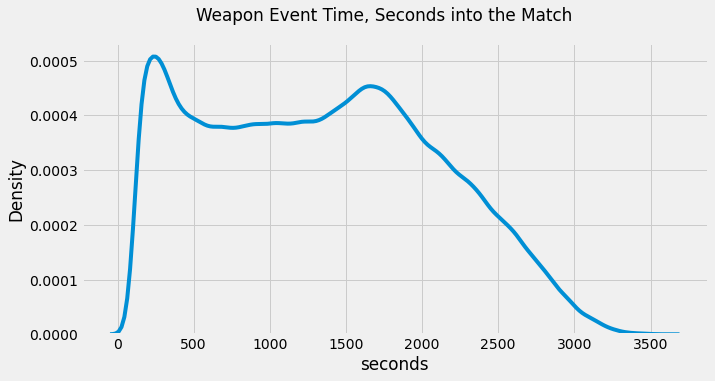

In [40]:
fig = plt.figure(figsize=(10, 5))
sns.kdeplot(weapon_events['seconds'])
plt.suptitle("Weapon Event Time, Seconds into the Match")

The main feature of this variable is that weapon events descend in frequency very strongly as the game's time limit winds down, probably because teams have won or quit by that time. On its own this feature isn't very informative, but it can be very interesting when taken in combination with other features.

# Round Types

In CS:GO, each match consists of a certain number of rounds. The two teams start with the same number of points in the first round, and from there are provided additional points (dollars) at the beginning of each round: slightly more if the team won the previous round and slightly less if they lost.

These points make up the game's economy. Both teams must purchase weapons, armor, and consumables at the beginning of each round. The amount and quality of the equipment they can bring is limited by how many points they have available and are willing to spend.

There is a well-developed strategy to when and when not to spend points. On average, the better equipped the team, the better its chance of winning the round, but also the worse its cash reserves for future rounds. It's nevertheless obviously possible to beat a much better equipped team with worser weaponry, so sometimes (even often, in competitive games) teams will "bet" on a low equipment rollout and try to "steal" the round. Due to the way the game economy works, winning a round in this manner is highly cost-effective because it also sets your team up for winning future rounds.

The `round_types` column is a heuristical estimate of what type of round is being played at the time of event, based on the total/relative levels of spend on either team.

`NORMAL` rounds are just that. `ECO` and `SEMI_ECO` rounds are rounds in which one or more teams saves their points for future rounds. `FORCE_BUY` rounds are an extreme form when one team has exhausted its cash reserves and so is "handed" minimum-tier equipment (this is also part of game strategy). `PISTOL_ROUND` is an early game rounds where both teams are conserving points, and hence, using solely pistols (the cheapest kind of weapon).

<AxesSubplot:title={'center':'Round Types'}>

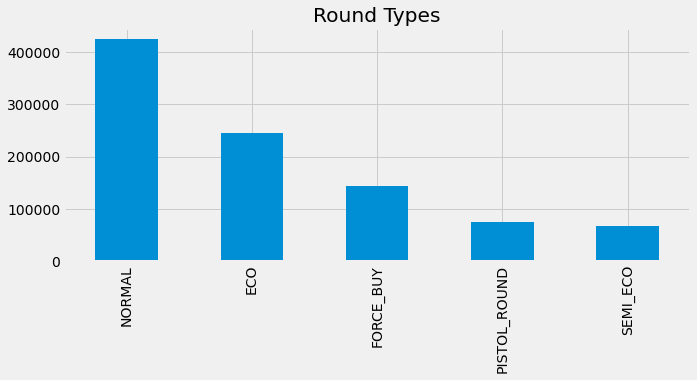

In [41]:
weapon_events['round_type'].value_counts().plot.bar(title='Round Types', **plt_kwargs)

As you can see, teams play "normal" rounds almost less often than they play economically-driven ones! Managing the team's cash reserves is obviously a big part of the strategy.

We can see this in action through a different lense by looking at the raw data for this variable, `ct_eq_val` and `t_eq_val`, which measure the total weapon value buyed-in for either team.

# Round Spend Value

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Team Round Spend Values')

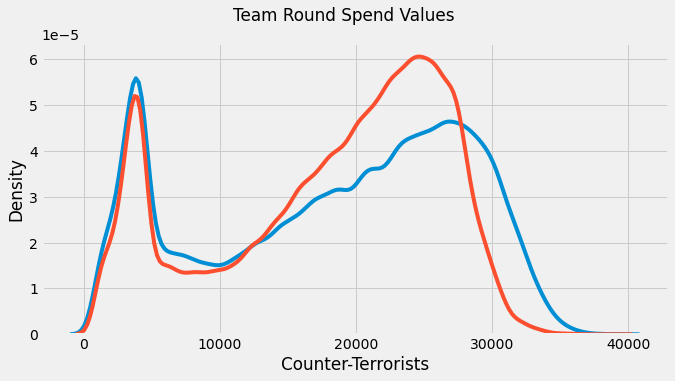

In [42]:
fig = plt.figure(figsize=(10, 5))
sns.kdeplot(weapon_events['ct_eq_val'].rename('Counter-Terrorists'))
sns.kdeplot(weapon_events['t_eq_val'].rename('Terrorists'))
plt.suptitle("Team Round Spend Values")

As you can see teams have a very strong tendancy to buy equipment that's worth either "almost nothing" or "a lot". Interestingly, on buy rounds counter-terrorists tend to spend slightly more than Terrorists, possibly because they have a higher limit to the maximum amount of equipment they can buy.

How much advantage is created by additonal spend?

In [43]:
match_level_data = weapon_events.groupby('file').head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, '% Games Won')

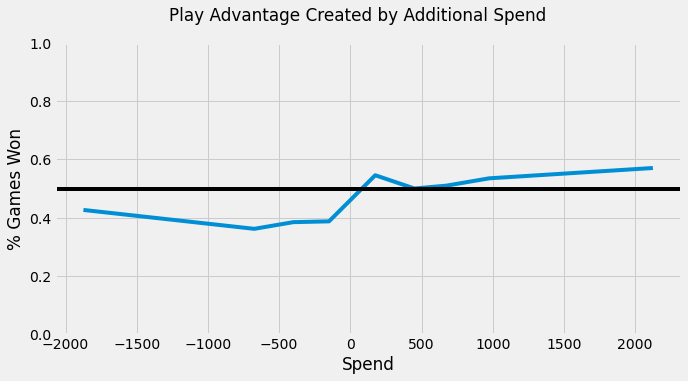

In [44]:
df = pd.DataFrame().assign(winner=match_level_data['winner_side'], point_diff=match_level_data['ct_eq_val'] - match_level_data['t_eq_val'])
df = df.assign(point_diff=df.apply(lambda srs: srs.point_diff if srs.winner[0] == 'C' else -srs.point_diff, axis='columns'), winner=df.winner.map(lambda v: True if v[0] == 'C' else False))

df = (df
     .assign(point_diff_cat=pd.qcut(df.point_diff, 10))
     .groupby('point_diff_cat')
     .apply(lambda df: df.winner.sum() / len(df.winner))
)
df.index = df.index.values.map(lambda inv: inv.left + (inv.right - inv.left) / 2).astype(int)

fig = plt.figure(figsize=(10, 5))
df.plot.line()
plt.suptitle("Play Advantage Created by Additional Spend")
ax = plt.gca()
ax.axhline(0.5, color='black')
ax.set_ylim([0, 1])
ax.set_xlabel('Spend')
ax.set_ylabel('% Games Won')

Surprisingly little! It seems that spending significantly more cash on a round than your opponent will only buy you, at most, a 10 percent greater chance of victory.

Here's another way of visualizing this effect. In the chart that follows, the blue line is the probability distribution for rounds won, while the red line is the probability distribution for all rounds. Winning teams do spend statistically significantly more than losing teams, but the effect is very small, at least in proportion to the size of the effect I expected.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Team Weapon Values')

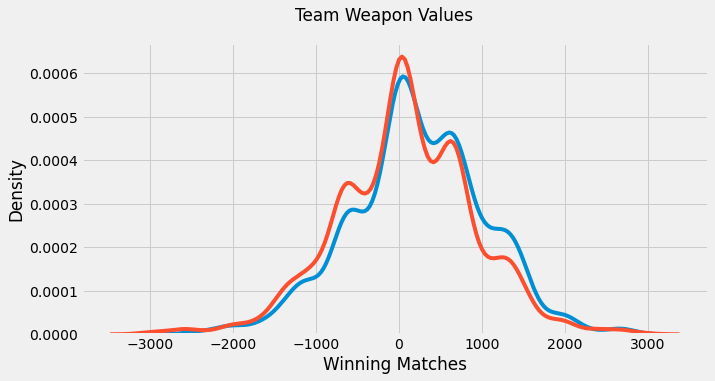

In [45]:
fig = plt.figure(figsize=(10, 5))

sns.kdeplot(match_level_data.query('winner_side == "CounterTerrorist"').pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('Winning Matches'))
sns.kdeplot(match_level_data.pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('All Matches'))

plt.suptitle("Team Weapon Values")

# Spend Utilization

When a team decides it's going to spend money, what is it spending that money on anyway? To find out, let's look at the `wp_type` in our events averaged by total spend (`ct_eq_val` plus `t_eq_val`).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

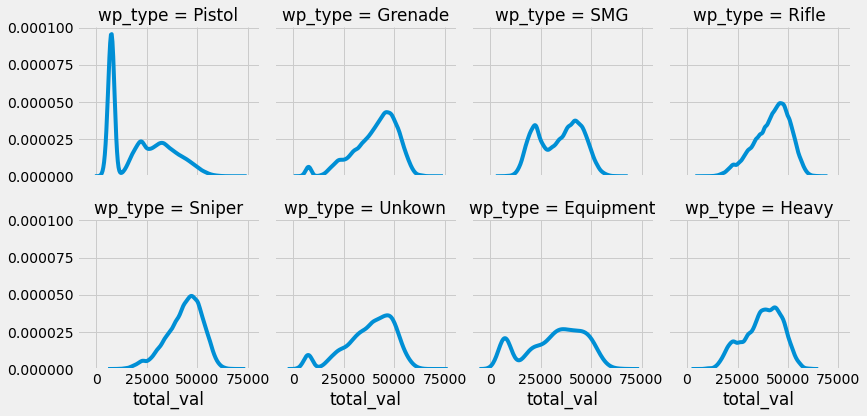

In [46]:
g = sns.FacetGrid(weapon_events.assign(
    total_val=weapon_events['ct_eq_val'] + weapon_events['t_eq_val']
), col="wp_type", col_wrap=4)
g.map(sns.kdeplot, 'total_val')

It seems that Rifles, Snipers, and Heavy Weapons are equally probabilistically likely to appear closest to the 50,000 "sweet spot". As CS:GO has five-person teams, this is 10,000/person; a logical, and interesting, numerical amount of dollars to spend.

Pistols are an exception, for the obvious reason that they, being the cheapest weapon, are the weapon of choice for the aforementioned 'Eco' rounds. It's interesting to see also that many players play games at mid-range spend, but still using pistols. These players are likely loading up on body armor and other equipment instead.

If one is not satisfied using a pistol, an SMG seems to be an alternative economical weapon of choice. SMGs appear in 10,000/person games reasonably often, but also have a second peak at around 3,000 or so.

Again, we see how strong the "all-or-nothing" effect is. Teams seem to be very reluctant to spend a mid-range amount of cash.

## Pistol Rounds ranking

In [47]:
gb_team_1_first_pistol   = economy_df.rename(columns={'team_1':'team','t1_start':'side'}).groupby(['side','time_period','team'])['1_winner'].agg(['mean','count'])
gb_team_1_second_pistol  = economy_df.rename(columns={'team_1':'team','t2_start':'side'}).groupby(['side','time_period','team'])['16_winner'].agg(['mean','count'])

gb_team_2_first_pistol   = economy_df.rename(columns={'team_2':'team','t2_start':'side'}).groupby(['side','time_period','team'])['1_winner'].agg(['mean','count'])
gb_team_2_second_pistol  = economy_df.rename(columns={'team_2':'team','t1_start':'side'}).groupby(['side','time_period','team'])['16_winner'].agg(['mean','count'])

In [48]:
gb = (2-gb_team_1_first_pistol['mean'])*gb_team_1_first_pistol['count']+(
    2-gb_team_1_second_pistol['mean'])*gb_team_1_second_pistol['count']+(
    gb_team_2_first_pistol['mean']-1)*gb_team_2_first_pistol['count']+(
    gb_team_2_second_pistol['mean']-1)*gb_team_2_second_pistol['count']

total_pistols = (gb_team_1_first_pistol['count']+gb_team_1_second_pistol['count']+gb_team_2_first_pistol['count']+gb_team_2_second_pistol['count'])

for major in majors[3:]:
    col = major['tournament']
    
    _filter = total_pistols > total_pistols.loc[:,col].quantile(0.3)
    
    gb.loc[:,col] = gb.loc[_filter,col]
    total_pistols.loc[:,col] = total_pistols.loc[_filter,col]
    
    gb.dropna(inplace=True)
    total_pistols.dropna(inplace=True)

mean_pistols = pd.DataFrame(gb/total_pistols)
mean_pistols.dropna(inplace=True)
mean_pistols.sort_values(['side','time_period',0],ascending=[1,1,0],inplace=True)

In [49]:
def get_rankings_pistols_side(side):
    ranking_pistols_side = pd.DataFrame(index=range(1,8))
    ranking_pistols_side.index.name = 'ranking'

    for major in majors[3:]:
        col = major['tournament']
        ranking_pistols_side[col] = mean_pistols.loc[side,col][0][:7].index
    
    return ranking_pistols_side

In [50]:
print('\nRankings Pistols CT-side:')
display(get_rankings_pistols_side('ct'))
print('\nRankings Pistols T-side:')
display(get_rankings_pistols_side('t'))


Rankings Pistols CT-side:


04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                   FaZe            FaZe           OpTic      Virtus.pro   
2                    CLG           North             BIG        Astralis   
3             Virtus.pro          Cloud9        Astralis            MIBR   
4                     SK      Virtus.pro           North           OpTic   
5                   Envy           OpTic             NRG       Renegades   
6                 Cloud9     HellRaisers  Space Soldiers      Complexity   
7                  North  Space Soldiers          Cloud9          Liquid   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                    FaZe          Heroic  
2                      G2             BIG  
3               Renegades          Liquid  
4                    MIBR           CR4ZY  
5                   OpTic         AVANGAR  
6                Astralis        Astralis  
7                   FURIA            ENCE


Rankings Pistols T-side:


04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                   FaZe     mousesports          Heroic          Liquid   
2                 Cloud9       Renegades        Imperial        Astralis   
3                    CLG           OpTic             NRG              G2   
4            mousesports     HellRaisers     mousesports      Virtus.pro   
5                     SK              SK  Space Soldiers             NRG   
6                  North          Cloud9         GODSENT            FaZe   
7              Immortals          Gambit        Astralis          Cloud9   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                Valiance             BIG  
2           Natus Vincere     100 Thieves  
3                Astralis          fnatic  
4                  fnatic            FaZe  
5                 Windigo          Sprout  
6                  Liquid       Renegades  
7                Vitality   Evil Geniuses

# Players DataFrame

## Players ranking by map

In [51]:
players_df.head()

date player_name           team opponent        country  player_id  \
0  2020-02-26      Brehze  Evil Geniuses   Liquid  United States       9136   
1  2020-02-26      Brehze  Evil Geniuses   Liquid  United States       9136   
2  2020-02-26      Brehze  Evil Geniuses   Liquid  United States       9136   
3  2020-02-26        CeRq  Evil Geniuses   Liquid       Bulgaria      11219   
4  2020-02-26        CeRq  Evil Geniuses   Liquid       Bulgaria      11219   

   match_id  event_id         event_name  best_of     map_1 map_2    map_3  \
0   2339385      4901  IEM Katowice 2020        3  Overpass  Nuke  Inferno   
1   2339385      4901  IEM Katowice 2020        3  Overpass  Nuke  Inferno   
2   2339385      4901  IEM Katowice 2020        3  Overpass  Nuke  Inferno   
3   2339385      4901  IEM Katowice 2020        3  Overpass  Nuke  Inferno   
4   2339385      4901  IEM Katowice 2020        3  Overpass  Nuke  Inferno   

   kills  assists  deaths  hs  flash_assists  kast  kddiff   adr  fkdiff  \
0     57       14      61  29            0.0  71.1      -4  79.9       0   
1     57       14      61  29            0.0  71.1      -4  79.9       0   
2     57       14      61  29            0.0  71.1      -4  79.9       0   
3     54       10      54  18            4.0  65.1       0  71.7       2   
4     54       10      54  18            4.0  65.1       0  71.7       2   

   rating  m1_kills  m1_assists  m1_deaths  m1_hs  m1_flash_assists  m1_kast  \
0    1.04        11           3         18      5               0.0     65.2   
1    1.04        11           3         18      5               0.0     65.2   
2    1.04        11           3         18      5               0.0     65.2   
3    0.98        11           2         17      4               2.0     60.9   
4    0.98        11           2         17      4               2.0     60.9   

   m1_kddiff  m1_adr  m1_fkdiff  m1_rating  m2_kills  m2_assists  m2_deaths  \
0         -7    60.8         -1       0.70      30.0         7.0       24.0   
1         -7    60.8         -1       0.70      30.0         7.0       24.0   
2         -7    60.8         -1       0.70      30.0         7.0       24.0   
3         -6    68.9         -1       0.75      26.0         6.0       19.0   
4         -6    68.9         -1       0.75      26.0         6.0       19.0   

   m2_hs  m2_flash_assists  m2_kast  m2_kddiff  m2_adr  m2_fkdiff  m2_rating  \
0   16.0               0.0     73.5        6.0    99.2        6.0       1.38   
1   16.0               0.0     73.5        6.0    99.2        6.0       1.38   
2   16.0               0.0     73.5        6.0    99.2        6.0       1.38   
3    8.0               1.0     76.5        7.0    80.1        3.0       1.24   
4    8.0               1.0     76.5        7.0    80.1        3.0       1.24   

   m3_kills  m3_assists  m3_deaths  m3_hs  m3_flash_assists  m3_kast  \
0      16.0         4.0       19.0    8.0               0.0     73.1   
1      16.0         4.0       19.0    8.0               0.0     73.1   
2      16.0         4.0       19.0    8.0               0.0     73.1   
3      17.0         2.0       18.0    6.0               1.0     53.8   
4      17.0         2.0       18.0    6.0               1.0     53.8   

   m3_kddiff  m3_adr  m3_fkdiff  m3_rating  kills_ct  deaths_ct  kddiff_ct  \
0       -3.0    71.6       -5.0       0.91      34.0       30.0        4.0   
1       -3.0    71.6       -5.0       0.91      34.0       30.0        4.0   
2       -3.0    71.6       -5.0       0.91      34.0       30.0        4.0   
3       -1.0    63.1        0.0       0.87      37.0       25.0       12.0   
4       -1.0    63.1        0.0       0.87      37.0       25.0       12.0   

   adr_ct  kast_ct  rating_ct  kills_t  deaths_t  kddiff_t  adr_t  kast_t  \
0    81.6     79.2       1.10     23.0      31.0      -8.0   77.5    60.0   
1    81.6     79.2       1.10     23.0      31.0      -8.0   77.5    60.0   
2    81.6     79.2       1.10     23.0

In [52]:
all_maps_columns = ['date','time_period','country','player_name','team','opponent','player_id',
                    'match_id','event_id','event_name','best_of']
each_map_columns = ['kills','assists','deaths','hs','flash_assists','kast','kddiff','adr','fkdiff','rating']

In [53]:
map1_columns = ['map_1']+['m1_'+ x for x in each_map_columns]
map2_columns = ['map_2']+['m2_'+ x for x in each_map_columns]
map3_columns = ['map_3']+['m3_'+ x for x in each_map_columns]

In [54]:
out_columns = all_maps_columns+['_map']+each_map_columns

players_df_by_map_columns = pd.DataFrame(columns=out_columns)

In [55]:
#Countries that contribute the most to the professional scene by number of matches
players_df.groupby('country')['country'].count().sort_values(ascending=False)[:30]

country
Denmark                   13562
Sweden                    11031
United States              9216
France                     7116
Brazil                     6463
Poland                     5415
Russia                     4390
Ukraine                    3640
Canada                     3295
Germany                    3050
Finland                    2358
Australia                  2020
Kazakhstan                 1917
Turkey                     1801
Slovakia                   1791
Norway                     1737
Bulgaria                   1402
China                       856
Bosnia and Herzegovina      852
Belgium                     851
Netherlands                 823
Estonia                     750
Serbia                      619
Czech Republic              587
United Kingdom              585
Spain                       551
Hungary                     417
Lithuania                   307
Jordan                      299
Indonesia                   212
Name: country, dtype: int64

In [56]:
curr_map = {}
curr_map[0] = players_df[(all_maps_columns+map1_columns)]
curr_map[1] = players_df[(all_maps_columns+map2_columns)]
curr_map[2] = players_df[(all_maps_columns+map3_columns)]

curr_map[0].columns = out_columns
curr_map[1].columns = out_columns
curr_map[2].columns = out_columns

all_maps = pd.concat(   (   pd.concat(   (curr_map[0],curr_map[1])    ), curr_map[2]   )   )

In [57]:
gb2 = all_maps.groupby(['time_period','player_id','_map'])
threshold_maps_played = 7
all_maps2 = gb2.filter(lambda x:x.player_name.count()>threshold_maps_played)
all_maps2.head()

date      time_period        country player_name           team  \
0  2020-02-26  09. Berlin 2019  United States      Brehze  Evil Geniuses   
1  2020-02-26  09. Berlin 2019  United States      Brehze  Evil Geniuses   
2  2020-02-26  09. Berlin 2019  United States      Brehze  Evil Geniuses   
3  2020-02-26  09. Berlin 2019       Bulgaria        CeRq  Evil Geniuses   
4  2020-02-26  09. Berlin 2019       Bulgaria        CeRq  Evil Geniuses   

  opponent  player_id  match_id  event_id         event_name  best_of  \
0   Liquid       9136   2339385      4901  IEM Katowice 2020        3   
1   Liquid       9136   2339385      4901  IEM Katowice 2020        3   
2   Liquid       9136   2339385      4901  IEM Katowice 2020        3   
3   Liquid      11219   2339385      4901  IEM Katowice 2020        3   
4   Liquid      11219   2339385      4901  IEM Katowice 2020        3   

       _map  kills  assists  deaths   hs  flash_assists  kast  kddiff   adr  \
0  Overpass   11.0      3.0    18.0  5.0            0.0  65.2    -7.0  60.8   
1  Overpass   11.0      3.0    18.0  5.0            0.0  65.2    -7.0  60.8   
2  Overpass   11.0      3.0    18.0  5.0            0.0  65.2    -7.0  60.8   
3  Overpass   11.0      2.0    17.0  4.0            2.0  60.9    -6.0  68.9   
4  Overpass   11.0      2.0    17.0  4.0            2.0  60.9    -6.0  68.9   

   fkdiff  rating  
0    -1.0    0.70  
1    -1.0    0.70  
2    -1.0    0.70  
3    -1.0    0.75  
4    -1.0    0.75

In [58]:
gb = all_maps2.groupby(['time_period','_map','player_name'],sort=False)['rating','kddiff'].mean()
rankings = gb.sort_values(['time_period','_map','rating'],ascending=[1,1,0])

In [59]:
rankings_players = {}
for _map in maps:
    rankings_players[_map] = pd.DataFrame(index=range(1,21))
    rankings_players[_map].index.name = 'ranking'
    
    for major in majors:
        col = major['tournament']
        try:
            rankings_players[_map][col] = rankings.loc[col,_map].rating[:20].index
        except:
            pass

Best players on each map accordding to their average Rating 2.0:

In [60]:
for _map in maps:
    print('\n'+_map+':')
    display(rankings_players[_map])


Cache:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                      oskar             MICHU             HEN1   
2                  WorldEdit            ScreaM      olofmeister   
3                olofmeister             felps            ANGE1   
4                       NiKo              shox             Zero   
5                   coldzera          innocent         Kjaerbye   
6                     kennyS            MINISE          mixwell   
7                         JW              NiKo         coldzera   
8                       NBK-             oskar           Furlan   
9                      Shara             boltz        WorldEdit   
10                     KRIMZ               nex             Pimp   
11                  MAiNLiNE              HEN1            MICHU   
12                       mou            USTILO             NiKo   
13                       nex            bondik             Snax   
14                    koosta             STYKO            Happy   
15                      allu         SHOOWTiME           flusha   
16                      shox               RpK           v1c7oR   
17                    shroud               NAF            Xyp9x   
18                      Uber       olofmeister           dennis   
19                 seang@res           dupreeh              REZ   
20                    dennis              RUSH          BARBARR   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1               innocent           boltz       EspiranTo            Jame   
2                  Calyx             NAF            NiKo             NAF   
3                    fer        XANTARES            nexa         Twistzz   
4                     HS        coldzera           woxic          f0rest   
5               XANTARES           oskar          device          tabseN   
6                  suNny          FalleN           ISSAA        XANTARES   
7                  ANGE1             nex           Ethan          flusha   
8                   NiKo           GruBy        GuardiaN       EspiranTo   
9                  STYKO           chelo             NAF          qikert   
10                kennyS            NiKo        XANTARES           EliGE   
11                 Nifty           byali         Twistzz   Gratisfaction   
12                 boltz           tarik            apEX             jks   
13                draken            allu     olofmeister           fitch   
14               ShahZaM     pashaBiceps          tabseN          dennis   
15              Stewie2K           fitch           Calyx            CeRq   
16                  HEN1           AdreN           GruBy           oskar   
17             GeT_RiGhT          Hobbit         dupreeh            nexa   
18                cajunb          ScreaM          kennyS           dephh   
19                  rain          USTILO            NBK-           suNny   
20              coldzera         Twistzz            rain            NiKo   

        08. Katowice 2019  
ranking                    
1                    NBK-  
2                   ZywOo  
3                     RpK  
4                   KRIMZ  
5                      JW  
6                 Brollan  
7                  AmaNEk  
8                    Jame  
9                    apEX  
10                   ALEX  
11                    NAF  
12                   shox  
13                  twist  
14                  stavn  
15                 blameF  
16                 kennyS  
17                  mertz  
18                 buster  
19                 qikert  
20                   Xizt


Cobblestone:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                       Zero            kennyS           Hobbit   
2                      felps              apEX             Dima   
3                       Snax               AZR             shox   
4                   queztone            ScreaM         XANTARES   
5                      oskar       olofmeister            tarik   
6                     f0rest             oskar             NiKo   
7                     MINISE             nitr0              mou   
8                       mouz            MODDII            spaze   
9                      Happy             EliGE            Dosia   
10                     AdreN              RUSH           Savage   
11                  Kjaerbye            flusha             mouz   
12                     boltz             byali            ANGE1   
13                    Furlan            Magisk          DavCost   
14                    LUCAS1          coldzera             NBK-   
15                     STYKO              Snax           kennyS   
16                 markeloff                JW             Snax   
17                       AZR         stanislaw           Magisk   
18                     KRIMZ             DEVIL             HEN1   
19                    flamie         Skadoodle             SicK   
20                    rallen            FalleN            valde   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018  
ranking                                                   
1               coldzera             paz             paz  
2                  Calyx          Furlan           Calyx  
3               XANTARES        XANTARES        XANTARES  
4                    fer        snatchie           woxic  
5                Twistzz          f0rest             NAF  
6                  MICHU             REZ           KRIMZ  
7                 tabseN          s1mple             fer  
8                  bodyy             NAF            ngiN  
9              Skadoodle           GruBy         Twistzz  
10                 felps           suNny        coldzera  
11                 EliGE            HEN1          s1mple  
12                  niko           oskar           EliGE  
13                  apEX           byali    disco doplan  
14                   fnx          FalleN      electronic  
15             autimatic            ropz          v1c7oR  
16          disco doplan          LUCAS1          bondik  
17                kennyS     pashaBiceps          FalleN  
18              freddieb           kNgV-          flusha  
19                   nex           Lekr0    somedieyoung  
20                 AdreN             fer           Lekr0


Dust2:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                       NiKo             oskar            AdreN   
2                       HEN1            seized           device   
3                      oskar              Pimp            felps   
4                      STYKO              shox           bubble   
5                olofmeister             denis              mou   
6                       juho            chrisJ         coldzera   
7                     chrisJ            flamie            ANGE1   
8                     dennis          coldzera             HEN1   
9                   GuardiaN             boltz              fnx   
10                    device            FalleN           shroud   
11                 Skadoodle              NiKo           FalleN   
12                       fox            ScreaM              nex   
13                    bubble            rallen           dennis   
14                     xartE             felps              jks   
15                      Hiko              rain        autimatic   
16                     EliGE            shroud            twist   
17                    cajunb            flusha          ShahZaM   
18                       nex              Zeus        GeT_RiGhT   
19                    flusha               fnx           k0nfig   
20                      allu             bodyy             rain   

        06. Boston 2018 07. London 2018 08. Katowice 2019 09. Berlin 2019  
ranking                                                                    
1                device           mertz             ZywOo          syrsoN  
2                 woxic          s1mple        electronic           Maden  
3              XANTARES          Magisk             woxic          tabseN  
4                 ISSAA           valde            s1mple          hampus  
5                   nex            NiKo              ropz          device  
6                 Xyp9x           woxic              rain            k1to  
7                  allu          tabseN              NiKo           KRIMZ  
8                tabseN         dupreeh             EliGE            ropz  
9               dupreeh        XANTARES            kennyS          dennis  
10                MICHU             NAF            k0nfig        XANTARES  
11                 NiKo           EliGE           Twistzz           ZywOo  
12                EliGE            shox               NAF           woxic  
13               Magisk          AmaNEk              Jame            NiKo  
14               kennyS          device          Kjaerbye            Jame  
15                 Snax           Xyp9x            blameF             nex  
16             coldzera         Twistzz              gade          s1mple  
17               sergej          kennyS            AmaNEk            rain  
18               tiziaN            Jame            Edward      electronic  
19                  paz          sergej             SHiPZ           SHiPZ  
20             Kjaerbye            aizy            frozen        coldzera


Inferno:


01. Cluj-Napoca 2015 02. Columbus 2016 04. Atlanta 2017  \
ranking                                                           
1                      twist            device              nex   
2                        NAF            Edward            Calyx   
3                olofmeister              rain           tabseN   
4                      Nifty          queztone            Friis   
5                     ScreaM               nex             HEN1   
6                      oskar             oskar         XANTARES   
7                       Uber            flusha           device   
8                     kennyS            ScreaM         coldzera   
9                        fnx            flamie            boltz   
10                     Lekr0              Zero         innocent   
11                     felps          kioShiMa             allu   
12                    flusha               fox           LUCAS1   
13                      Hiko           dupreeh         GuardiaN   
14                    flamie              aizy           k0nfig   
15                        JW            TENZKI             rain   
16                   SmithZz              NBK-             NiKo   
17                  coldzera              Snax           ScreaM   
18                     boltz            seized              fer   
19                     KRIMZ              shox               HS   
20                     mitch            RUBINO           FalleN   

        05. Krakow 2017 06. Boston 2018 07. London 2018 08. Katowice 2019  \
ranking                                                                     
1                  rain             NAF           mertz            poizon   
2            electronic          Magisk           ZywOo            syrsoN   
3                  NiKo           SHiPZ          Aerial            qikert   
4                 DEVIL             nex        kioShiMa              Jame   
5                s1mple          device          s1mple            v1c7oR   
6                  CeRq        coldzera          sergej             SHiPZ   
7               Twistzz            nexa          gla1ve          XANTARES   
8                LUCAS1          nukkye          device        electronic   
9                 EliGE           woxic            Jame            s1mple   
10             GuardiaN         mixwell            apEX            device   
11                hutji          s1mple            NBK-            sergej   
12             XANTARES           oskar           Happy           Twistzz   
13                 ngiN          k0nfig            allu             ZywOo   
14               flamie            JUGi          Magisk             oskar   
15               ScreaM         dupreeh           Xyp9x             Xyp9x   
16                FugLy         Aleksib       autimatic            Magisk   
17                KRIMZ           Ethan       stanislaw            yuurih   
18          olofmeister          draken           woxic          xsepower   
19               Magisk        kioShiMa          es3tag            frozen   
20               device        XANTARES          xseveN            gla1ve   

        09. Berlin 2019  
ranking                  
1                 BnTeT  
2                 ZywOo  
3                dennis  
4                 EliGE  
5                   jks  
6             Maikelele  
7                 jkaem  
8                 SHiPZ  
9               Plopski  
10             coldzera  
11               kennyS  
12               s1mple  
13            EspiranTo  
14                Jerry  
15               device  
16             KSCERATO  
17             xsepower  
18                  INS  
19                 ropz  
20                Liazz


Mirage:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                       NiKo            device             niko   
2                    BARBARR                DD           dennis   
3                   GuardiaN            cajunb           flusha   
4                     flamie         captainMo            jdm64   
5                       allu            Edward        autimatic   
6                       Uber          coldzera             NiKo   
7                       tabu          Kjaerbye           device   
8                     Spiidi               fnx          SEMPHIS   
9                       HEN1               fer            boltz   
10                   DeadFox            Summer         GuardiaN   
11                     EliGE           dupreeh         Stewie2K   
12                    chrisJ            MODDII            oskar   
13                    TENZKI            Magisk           k0nfig   
14                    RUBINO              RUSH           draken   
15                   dupreeh            FalleN            xelos   
16                     twist            shroud     disco doplan   
17                 WorldEdit          Stewie2K            valde   
18                       fer           mixwell            twist   
19                    f0rest            bubble           MODDII   
20                  coldzera            cadiaN           cajunb   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                 Rickeh            NiKo          s1mple          s1mple   
2                ShahZaM          kennyS        XANTARES            niko   
3                    fer        XANTARES            CeRq           ZywOo   
4                  EliGE          s1mple          k0nfig            Jame   
5                   NiKo           suNny          device            JUGi   
6                  twist        coldzera            NiKo           woxic   
7                 device            JUGi      electronic        XANTARES   
8                 koosta            rain          Hobbit         huNter-   
9                 cadiaN            apEX       autimatic           oskar   
10                k0nfig        GuardiaN           woxic           hAdji   
11               Twistzz           oskar           KRIMZ          chrisJ   
12                   paz          FalleN           Ethan          bondik   
13                s1mple     olofmeister           suNny             NAF   
14                 Calyx          Hobbit     olofmeister         Twistzz   
15              Kjaerbye         mixwell          sergej           valde   
16              XANTARES           EliGE            rain           Jerry   
17              coldzera             mir           SHiPZ      electronic   
18                 felps              HS            nexa        coldzera   
19              Stewie2K       autimatic       EspiranTo          Brehze   
20                  Snax             NAF            JUGi          AmaNEk   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                 huNter-           ZywOo  
2                    Jame        XANTARES  
3                    nexa          s1mple  
4                  s1mple          tabseN  
5                   faveN           EliGE  
6              electronic       EspiranTo  
7                   ZywOo    somedieyoung  
8                   EliGE            NiKo  
9                xsepower          magixx  
10                  jkaem          blameF  
11                 blameF           stavn  
12                    fer             NAF  
13                 sergej         Twistzz  
14                 poizon            ropz  
15                 ottoNd            Jame  
16                  dycha     iDISBALANCE  
17               coldzera          frozen  
18                  Etha


Nuke:


03. Cologne 2016 04. Atlanta 2017 05. Krakow 2017 06. Boston 2018  \
ranking                                                                     
1                dupreeh           kennyS            shox          s1mple   
2                   roca             NiKo          kennyS          device   
3                 f0rest        markeloff           byali        XANTARES   
4                 USTILO        WorldEdit            ropz          Brehze   
5                 gla1ve            AdreN          device          gla1ve   
6                  byali              MSL          s1mple           EliGE   
7              GeT_RiGhT            valde             RpK         dupreeh   
8                 Magisk           Magisk            NBK-      electronic   
9                    TaZ          Twistzz          es3tag           Xyp9x   
10                 STYKO             JUGi         dupreeh           Ethan   
11               friberg            oskar           oskar          Magisk   
12                   ryx           cajunb           Happy     pashaBiceps   
13                cajunb             Snax            NiKo            JUGi   
14                  apEX       electronic            rain          kennyS   
15                  Hiko           k0nfig          chrisJ            aizy   
16                  allu            EliGE          ScreaM            ropz   
17                k0nfig             rain            Snax          es3tag   
18                 bodyy            byali            JUGi          sergej   
19               ShahZaM             aizy           valde            NiKo   
20                  Snax           MODDII     pashaBiceps          k0nfig   

        07. London 2018 08. Katowice 2019 09. Berlin 2019  
ranking                                                    
1                 ZywOo            s1mple          device  
2                 nitr0            device        KSCERATO  
3                cajunb              acoR            Sico  
4                gla1ve            f0rest          dexter  
5               dupreeh             ZywOo         huNter-  
6               Twistzz          Kjaerbye           ZywOo  
7                device              CeRq          syrsoN  
8                 valde        electronic          gla1ve  
9                sergej             EliGE           malta  
10               Magisk               jks             INS  
11                Xyp9x            Brehze          f0rest  
12               es3tag          coldzera          meyern  
13                 Snax           Twistzz          chrisJ  
14                bodyy             JaCkz            CeRq  
15               chrisJ             mertz             NAF  
16                 CeRq            sergej          es3tag  
17                mertz            Rickeh      electronic  
18               Brehze            yuurih            ropz  
19               tabseN             b0RUP          tabseN  
20                  mou              rain          s1mple


Overpass:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                     flusha              shox           s1mple   
2                     Magisk          Stewie2K           Magisk   
3                    dupreeh             oskar           flamie   
4                        NAF           dupreeh             NiKo   
5                     koosta               fer           bubble   
6                     MODDII            ScreaM           v1c7oR   
7                     s1mple            shroud         freddieb   
8                     k0nfig            device              NAF   
9                     kennyS            Magisk             RUSH   
10                   Ex6TenZ               NAF          mixwell   
11                    FalleN          coldzera        Maikelele   
12                  Kjaerbye              Snax           MODDII   
13                    device            f0rest           Edward   
14                    shroud               fnx            valde   
15                 WorldEdit         WorldEdit            jkaem   
16                       fnx           n0thing             aizy   
17               olofmeister               NEO           flusha   
18                       fer              RUSH            felps   
19                        JW         GeT_RiGhT           SZPERO   
20                    cajunb             bodyy            Lekr0   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                ShahZaM        coldzera          cromen            apEX   
2                 tabseN             fer          s1mple          tabseN   
3                  AdreN          s1mple            CeRq           ZywOo   
4                   SicK            rain           Ethan          s1mple   
5                 bondik           oskar         Brollan          AmaNEk   
6               XANTARES            ropz       EspiranTo           Ethan   
7                    fer           Calyx           FugLy         Aleksib   
8                    fnx            Zero          device            allu   
9                  Lekr0            NiKo             REZ        Kjaerbye   
10              Stewie2K             NAF          es3tag           woxic   
11                 boltz     olofmeister          Magisk         Brollan   
12               Twistzz          FalleN         dupreeh           mertz   
13                  JUGi         Ex6TenZ          qikert      electronic   
14              coldzera        GuardiaN          gla1ve            NBK-   
15              Kjaerbye          Magisk            nexa          Brehze   
16                s1mple          f0rest          v1c7oR            shox   
17                 Xyp9x           Nifty           valde          es3tag   
18                 ANGE1             MSL             NAF            NiKo   
19                  niko           GruBy          hampus            CeRq   
20                  NBK-          k0nfig          Furlan       autimatic   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                   TeSeS          yuurih  
2                    NiKo            roeJ  
3                     REZ            rain  
4                   ZywOo            ropz  
5                   EliGE            acoR  
6                    Jame        coldzera  
7                  blameF         Brollan  
8                  s1mple          Magisk  
9                 Boombl4        KSCERATO  
10                    NAF            NiKo  
11               coldzera             REZ  
12                  valde          sjuush  
13                dupreeh            VINI  
14                 Magisk            HEN1  
15                  nitr0        xsepower  
16                 qikert            aizy  
17                Twistzz          s1mple  
18                 poizo


Train:


01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                     rallen            f0rest           FalleN   
2                  facecrack              rain         coldzera   
3                     Furlan            bubble           bubble   
4                     FalleN              SicK              fer   
5                       repo            device           flusha   
6                  WorldEdit          coldzera            AdreN   
7                        fer               mou           device   
8                      jdm64            flamie            Lekr0   
9                         JW            Magisk           flamie   
10                  GuardiaN               ptr        autimatic   
11                    Magisk          Kjaerbye         Stewie2K   
12                 Skadoodle            flusha            twist   
13                 GeT_RiGhT              HEN1            suNny   
14                     Hyper         GeT_RiGhT           dennis   
15                  coldzera            FalleN           Savage   
16                      HEN1            Furlan         freddieb   
17                       AZR           mixwell         Kjaerbye   
18                    s1mple              Xizt             apEX   
19                    ub1que              NiKo          znajder   
20                    device                JW            felps   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1                  suNny           GruBy          Aerial          s1mple   
2              GeT_RiGhT          s1mple          s1mple          device   
3                 draken          device        XANTARES         Boombl4   
4                 s1mple          k0nfig            allu           Ethan   
5               XANTARES        XANTARES            nexa            NiKo   
6                 Hobbit             fer            JUGi             jks   
7                 device      electronic           woxic          Brehze   
8                 FalleN             RpK          device           woxic   
9                  AdreN          f0rest           Ethan           valde   
10                   nex          Furlan          sergej           jkaem   
11                chrisJ          flusha       autimatic           oskar   
12                 oskar             paz            NiKo          to1nou   
13                 ANGE1         mixwell         KrizzeN        GuardiaN   
14                   fer            SicK           oskar          sergej   
15                f0rest        Stewie2K          flusha            Jame   
16                Rickeh           boltz            ropz         huNter-   
17              coldzera           Lekr0          flamie          AmaNEk   
18                  NiKo       GeT_RiGhT      electronic        coldzera   
19                    HS              JW          buster           suNny   
20                LUCAS1        coldzera            CeRq           Xyp9x   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                  s1mple          s1mple  
2              electronic      electronic  
3                    CeRq         Brollan  
4                    nexa            mouz  
5                   Xyp9x         almazer  
6                    aizy        xsepower  
7                 Brollan            HEN1  
8                  Brehze        innocent  
9                    NiKo           nawwk  
10                   allu          f0rest  
11                  Ethan            ropz  
12                    jks         huNter-  
13                  JaCkz        KSCERATO  
14                 device            acoR  
15                 FalleN         Bubzkji  
16                dupreeh          Magisk  
17                 Aerial             emi  
18                     J


Vertigo:


08. Katowice 2019 09. Berlin 2019
ranking                                  
1                  k0nfig         Brollan
2                   jkaem           STYKO
3                   EliGE         huNter-
4                  device            zehN
5                 huNter-             jks
6                    nexa          device
7                   Xyp9x          Golden
8                     MSL           Liazz
9                    niko           STOMP
10                dupreeh           stavn
11               Stewie2K       Maikelele
12                refrezh          AmaNEk
13                  JaCkz           Maden
14              EspiranTo           nawwk
15                 Magisk            FL1T
16                    jks          sjuush
17                    NAF           reatz
18                     HS          cadiaN
19                 kennyS          es3tag
20                  LETN1           Xyp9x

## Players ranking all maps

In [61]:
ranking_players_df = pd.DataFrame()
ranking_players_df['player'] = players_df.player_name.unique()
ranking_players_df.set_index('player',inplace=True)

for major in majors:
    col = major['tournament']
    ranking_players_df[col] = 0
    
for _map in maps:
    for col in rankings_players[_map].columns:
        for i in range(1,21):
            ranking_players_df.loc[rankings_players[_map][col][i],col] += 21-i
            
rankings_players_again = {}

rankings_players_again = pd.DataFrame(index=range(1,21))
rankings_players_again.index.name = 'ranking'

for major in majors:
    col = major['tournament']
    rankings_players_again[col] = ranking_players_df[col].sort_values(ascending=False)[:20].index

Below it is shown the player rankings if it was only determined by the rating 2.0 across all maps. It can be considered as the ranking of most versatile fraggers. 

In [62]:
rankings_players_again

01. Cluj-Napoca 2015 02. Columbus 2016 03. Cologne 2016  \
ranking                                                           
1                      oskar             oskar             NiKo   
2                       NiKo            ScreaM           bubble   
3                olofmeister            device         coldzera   
4                  WorldEdit          coldzera           device   
5                   GuardiaN              shox           flusha   
6                     kennyS              rain            ANGE1   
7                        NAF            Magisk           dennis   
8                       HEN1            flamie           Magisk   
9                         JW            flusha             HEN1   
10                      Uber           dupreeh            AdreN   
11                    flusha            Edward        autimatic   
12                    Magisk            f0rest           flamie   
13                     felps               fer           FalleN   
14                  coldzera               nex              mou   
15                    FalleN              NiKo          mixwell   
16                    flamie             felps            felps   
17                    Furlan          Kjaerbye           v1c7oR   
18                     twist             boltz         Kjaerbye   
19                   dupreeh            shroud             niko   
20                     STYKO            FalleN           Hobbit   

        04. Atlanta 2017 05. Krakow 2017 06. Boston 2018 07. London 2018  \
ranking                                                                    
1               XANTARES          s1mple          device          s1mple   
2                    fer        XANTARES        XANTARES           ZywOo   
3                  Calyx            NiKo          s1mple            Jame   
4                   NiKo           oskar           woxic           woxic   
5                 tabseN            rain           Ethan           mertz   
6               coldzera        coldzera            nexa          device   
7                  AdreN           GruBy            NiKo          tabseN   
8                Twistzz             NAF             NAF           valde   
9                ShahZaM          FalleN          Magisk         Twistzz   
10                device            ropz         dupreeh        XANTARES   
11                 suNny          kennyS            CeRq             NAF   
12                kennyS           byali       EspiranTo          Magisk   
13                   nex             fer      electronic          sergej   
14                 EliGE          device           EliGE            NiKo   
15              innocent          f0rest             nex           Ethan   
16                 boltz      electronic           ISSAA            apEX   
17                s1mple          Furlan            allu          gla1ve   
18                draken             paz        coldzera         dupreeh   
19                Rickeh        GuardiaN            JUGi          AmaNEk   
20                 ANGE1           suNny           Xyp9x           oskar   

        08. Katowice 2019 09. Berlin 2019  
ranking                                    
1                  s1mple           ZywOo  
2                   ZywOo          device  
3              electronic          s1mple  
4                   EliGE         Brollan  
5                    Jame            ropz  
6                  device        KSCERATO  
7                    nexa         huNter-  
8                    NiKo          tabseN  
9                   Xyp9x          syrsoN  
10                huNter-           EliGE  
11                 blameF             jks  
12                    NAF            NiKo  
13                   CeRq        XANTARES  
14                Twistzz          dennis  
15                 k0nfig        coldzera  
16                  jkaem           Maden  
17                 poizon      electronic  
18                Brolla

## K/D Graph

In [63]:
results_df_rank_part_1 = results_df[['match_id','team_1','rank_1']].rename(columns={'team_1':'team','rank_1':'team_rank'})
results_df_rank_part_2 = results_df[['match_id','team_2','rank_2']].rename(columns={'team_2':'team','rank_2':'team_rank'})
results_df_rank = pd.concat((results_df_rank_part_1,results_df_rank_part_2))

In [64]:
all_maps3 = all_maps2.merge(results_df_rank,'left',on=['match_id','team'])

In [65]:
players_series = all_maps3.groupby('player_name').team_rank.min()
players_list = list(players_series[players_series<=3].index)

In [66]:
gb = all_maps3.groupby(['time_period','player_name','country'])['kills','deaths','team_rank']
gb = gb.mean()[gb.count()['kills']>100]
gb = gb[gb.index.get_level_values(1).isin(players_list)]

gb['kills'] = gb['kills'].round(1)
gb['deaths'] = gb['deaths'].round(1)
gb['team_rank'] = gb['team_rank'].round(0).astype('int')
gb.reset_index(inplace=True)

In [67]:
gb['region'] = ''
gb.loc[(gb['country']=='Ukraine') | (gb['country']=='Russia') | (gb['country']=='Kazakhstan'),'region'] = 'CIS'
gb.loc[(gb['country']=='Brazil'),'region'] = 'Brazil'
gb.loc[(gb['country']=='France') | (gb['country']=='Belgium'),'region'] = 'France/Belgium'
gb.loc[(gb['country']=='United States') | (gb['country']=='Canada'),'region'] = 'North America'
gb.loc[(gb['country']=='Denmark'),'region'] = 'Denmark'
gb.loc[(gb['country']=='Sweden'),'region'] = 'Sweden'
gb.loc[(gb['country']=='Poland'),'region'] = 'Poland'
gb.loc[gb.country.isin(['Netherlands','Slovakia','Bosnia and Herzegovina',
                        'Norway','Czech Republic','Spain','Estonia','United Kingdom','Portugal','Turkey','Bulgaria', 'Finland']),'region'] = 'Rest of Europe'

gb = gb.sort_values(['time_period','region'])

In [68]:
gb['size'] = (100/(gb['team_rank']+2)).round(1)

In [69]:
fig = px.scatter(gb, x="deaths", y="kills", animation_frame="time_period", animation_group="player_name",
           size="size", color="region", hover_name="player_name", hover_data=["team_rank"],
                 range_x=[14,24],range_y=[14,24]
                )
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 1300
fig.update_layout(xaxis_title='Deaths', yaxis_title = 'Kills')
fig.add_shape(type="line", x0=14, y0=14, x1=24, y1=24, line=dict(width=4, dash="dot"))
fig.update_shapes(dict(xref='x', yref='y'))
fig.show()

# Picks DataFrame

#### Impact Of Map Picks on Team Victory

In [80]:
choses=picks_df[['team_1','team_2','match_id', 'event_id','t1_picked_1','t2_picked_1']]
winners=results_df[['team_1', 'team_2', '_map','map_winner','event_id','match_id']]

In [81]:

picks_df.rename(columns={"team_1":"team_1_pick","team_2":"team_2_pick" }, inplace=True)

new_df = pd.merge(results_df, picks_df, left_on="match_id", right_on="match_id")

#filter for best of 3's
new_df = new_df[new_df["best_of"] == "3"]

#add new column for winning team name
new_df["winning_team_name"] = ""
new_df.loc[new_df["map_winner"]==1, "winning_team_name"] = new_df["team_1"]
new_df.loc[new_df["map_winner"]==2, "winning_team_name"] = new_df["team_2"]

#create column for name of team who picked the map
new_df["map_picker"] = ""
new_df.loc[new_df["_map"] == new_df["t1_picked_1"], "map_picker"] = new_df["team_1_pick"]
new_df.loc[new_df["_map"] == new_df["t2_picked_1"], "map_picker"] = new_df["team_2_pick"]
new_df.loc[new_df["_map"] == new_df["left_over"], "map_picker"] = "left_over"

#remove decider games
new_df = new_df[new_df["map_picker"] != "left_over"]

#create column for pick win
new_df["pick_win"] = new_df["winning_team_name"] == new_df["map_picker"]

#create column for rank of winning team
new_df["winning_rank"] = 0
new_df.loc[new_df["map_winner"]==1, "winning_rank"] = new_df["rank_1"]
new_df.loc[new_df["map_winner"]==2, "winning_rank"] = new_df["rank_2"]

#create column for rank of losing team
new_df["losing_rank"] = 0
new_df.loc[new_df["map_winner"]==1, "losing_rank"] = new_df["rank_2"]
new_df.loc[new_df["map_winner"]==2, "losing_rank"] = new_df["rank_1"]

#filter for only teams in the top twenty
new_df = new_df[new_df['winning_rank']< 21]
new_df = new_df[new_df['losing_rank']< 21]

#filter for after a certain date
new_df['date_x'] = pd.to_datetime(new_df['date_x'])
new_df = new_df[new_df['date_x'] > "12-31-2016"]

#groupby team
grouper = new_df.groupby("map_picker")["pick_win"].value_counts(normalize=True)
grouper = grouper[grouper.index.isin([True], level=1)]

#Remove redundant index and sort
grouper = grouper.reset_index(level=1, drop=True)
grouper = grouper.sort_values(ascending = False)
grouper = grouper.to_frame()
grouper = grouper.reset_index()

#Add column based on number of games
filter_series = new_df["map_picker"].value_counts()
filter_series = filter_series.to_frame()
filter_series = filter_series.reset_index()
grouper = pd.merge(grouper, filter_series, left_on="map_picker", right_on="index")
grouper = grouper.drop("index", 1)
grouper.rename(columns={"map_picker_x":"Team","pick_win": "Win Percentage", "map_picker_y":"Number of Games" }, inplace=True)
grouper = grouper[grouper["Number of Games"] > 20]
print(grouper)

              Team  Win Percentage  Number of Games
6         Astralis        0.778689              122
8             ENCE        0.645833               48
9   Space Soldiers        0.645161               31
10              G2        0.611111               90
12            FaZe        0.594828              116
13          Liquid        0.592308              130
14     mousesports        0.590164              122
15   Evil Geniuses        0.580645               31
16             NRG        0.568627               51
18   Natus Vincere        0.553571              112
19           North        0.521739               92
20              SK        0.517857               56
21          Gambit        0.516129               62
22          fnatic        0.515152               99
24        Vitality        0.500000               54
27           FURIA        0.500000               26
28     HellRaisers        0.500000               52
32            MIBR        0.471698               53
33          

### Team Ratings on T/CT sides on Various Maps

In [70]:
df = pd.read_csv("results.csv")

#### Feature Engineering

In [71]:
# cleaning up dataframe
df = df.drop('starting_ct',1)
df = df.drop('result_1',1)
df = df.drop('result_2',1)
df = df.drop('map_wins_1',1)
df = df.drop('map_wins_2',1)
df = df.drop('event_id',1)
df = df.loc[df['rank_1'] <= 10]
df = df.loc[df['rank_2'] <= 10]
#feature Engineering
df['MapWinner'] = df.apply(lambda row: row.team_2 if row.map_winner == 2 else row.team_1, axis = 1)
df['SeriesWinner'] = df.apply(lambda row: row.team_2 if row.match_winner == 2 else row.team_1, axis = 1)
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df.apply(lambda row: row.date.year, axis = 1)
df = df.loc[df['Year'] == 2018]
df = df.drop('date',1)

df = df.drop('map_winner',1)
df = df.drop('match_winner',1)
df.rename(columns = {'_map':'Map','team_1':'Team_One','team_2':'Team_Two','rank_1':'Team_Ones_Rank','rank_2': 'Team_Twos_Rank', \
                    'ct_1': 'Team_One_CT_Rounds','t_2': 'Team_Two_T_Rounds', 't_1':'Team_One_T_Rounds', 'ct_2':'Team_Two_CT_Rounds'}, inplace = True)
df = df.sort_values(by = 'match_id', ascending = False)
df = df.reset_index(drop = True)
df.head()

Team_One       Team_Two       Map  Team_One_CT_Rounds  Team_Two_T_Rounds  \
0  Astralis  Natus Vincere     Dust2                  12                  3   
1  Astralis  Natus Vincere  Overpass                   4                 11   
2  Astralis  Natus Vincere     Cache                  10                  5   
3      MIBR  Natus Vincere    Mirage                   3                  0   
4      FaZe            NiP   Inferno                  10                  5   

   Team_One_T_Rounds  Team_Two_CT_Rounds  match_id  Team_Ones_Rank  \
0                  4                   1   2329728               1   
1                  3                   5   2329728               1   
2                  6                   4   2329728               1   
3                 13                   2   2329723               4   
4                  5                  10   2329722               5   

   Team_Twos_Rank      MapWinner SeriesWinner  Year  
0               3       Astralis     Astralis  2018  
1               3  Natus Vincere     Astralis  2018  
2               3       Astralis     Astralis  2018  
3               3           MIBR         MIBR  2018  
4               7            NiP          NiP  2018

#### Inorder to analyze player performance of the winning team wins vs player performance of the losing team,data on match_id will be merged. The data is consolidated and averaged data a player's matchups for each map.

In [72]:
# cleaning up the player data
player_df = pd.read_csv("players.csv")
player_df = player_df[['player_name','team', 'match_id', 'm1_rating_ct', 'm1_rating_t', 'm2_rating_ct', \
                       'm2_rating_t','m3_rating_ct', 'm3_rating_t']]
player_df = player_df.dropna(subset=['m1_rating_ct', 'm1_rating_t', 'm2_rating_ct','m2_rating_t'])
player_df['Average_T_Rating'] = player_df[['m1_rating_t', 'm2_rating_t', 'm3_rating_t']].mean(axis=1)
player_df['Average_CT_Rating'] = player_df[['m1_rating_ct', 'm2_rating_ct', 'm3_rating_ct']].mean(axis=1)
player_df = player_df.drop(['m1_rating_ct','m1_rating_t', 'm2_rating_ct','m2_rating_t','m3_rating_ct',\
                            'm3_rating_t'],1)
player_df.rename(columns = {'player_name': 'Player', 'team': 'Team'}, inplace = True)
player_df.head()

Player           Team  match_id  Average_T_Rating  Average_CT_Rating
0  Brehze  Evil Geniuses   2339385          0.860000           1.080000
1    CeRq  Evil Geniuses   2339385          0.676667           1.150000
2   EliGE         Liquid   2339385          0.876667           1.486667
3   Ethan  Evil Geniuses   2339385          0.413333           1.096667
4     NAF         Liquid   2339385          0.876667           1.273333

The dataframe has been transformed. Each row now reflects a player's performance during a specific match. Player_df and df will be merged. Certain teams with poor performance will be dropped.

In [73]:
# creating a new dataframe by merging
new_df = pd.merge(player_df,df,on = 'match_id')
new_df = new_df.sort_values(by = 'match_id', ascending = False)
new_df = new_df.reset_index(drop = True)
new_df = new_df.drop('match_id',1)
new_df = new_df.drop('Year',1)
new_df = new_df.loc[new_df['Team'] != 'Renegades']
new_df = new_df.loc[new_df['Team'] != 'North']
new_df = new_df.loc[new_df['Team'] != 'NiP']
new_df = new_df.loc[new_df['Team'] != 'Gambit']
new_df = new_df.loc[new_df['Team'] != 'BIG']
new_df = new_df.loc[new_df['Team'] != 'NRG']
new_df = new_df.loc[new_df['Team'] != 'SK']
new_df = new_df.loc[new_df['Team'] != 'G2']
new_df.head()

Player           Team  Average_T_Rating  Average_CT_Rating  Team_One  \
0   Edward  Natus Vincere          0.833333               0.91  Astralis   
1  dupreeh       Astralis          1.306667               1.43  Astralis   
2   Edward  Natus Vincere          0.833333               0.91  Astralis   
3   s1mple  Natus Vincere          1.270000               0.90  Astralis   
4   s1mple  Natus Vincere          1.270000               0.90  Astralis   

        Team_Two       Map  Team_One_CT_Rounds  Team_Two_T_Rounds  \
0  Natus Vincere     Dust2                  12                  3   
1  Natus Vincere  Overpass                   4                 11   
2  Natus Vincere  Overpass                   4                 11   
3  Natus Vincere     Cache                  10                  5   
4  Natus Vincere  Overpass                   4                 11   

   Team_One_T_Rounds  Team_Two_CT_Rounds  Team_Ones_Rank  Team_Twos_Rank  \
0                  4                   1               1               3   
1                  3                   5               1               3   
2                  3                   5               1               3   
3                  6                   4               1               3   
4                  3                   5               1               3   

       MapWinner SeriesWinner  
0       Astralis     Astralis  
1  Natus Vincere     Astralis  
2  Natus Vincere     Astralis  
3       Astralis     Astralis  
4  Natus Vincere     Astralis

#### Visualising in bar charts, the performance of the Astralis,Cloud9 and Natus Vincere(teams the performed the best) based on map win,and CT/T side ratings

<IPython.core.display.Javascript object>

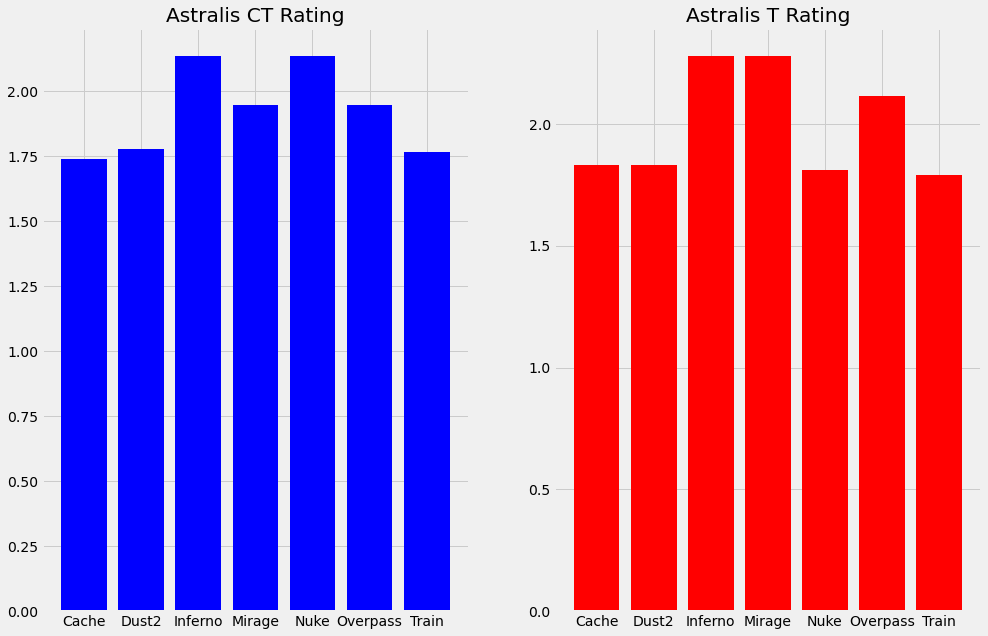

In [74]:
astralis_df = new_df.loc[new_df['Team'] == 'Astralis']
astralis_df = astralis_df.loc[astralis_df['MapWinner'] == 'Astralis']
astralis_df.reset_index(drop = True)
fig, (ax1, ax2) = plt.subplots(1,2,sharex = True, figsize = (15,10))
ax1.bar(x = astralis_df['Map'],height = astralis_df['Average_CT_Rating'], color = 'blue')
ax2.bar(x = astralis_df['Map'],height = astralis_df['Average_T_Rating'], color = 'red')

ax1.title.set_text('Astralis CT Rating')
ax2.title.set_text('Astralis T Rating')

<IPython.core.display.Javascript object>

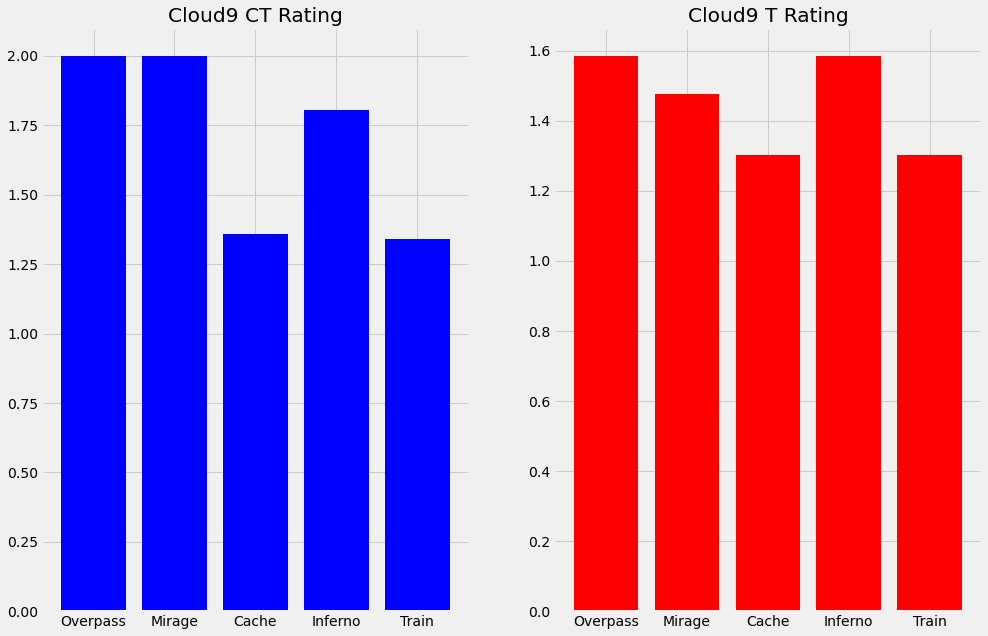

In [75]:
cloud9_df = new_df.loc[new_df['Team'] == 'Cloud9']
cloud9_df = cloud9_df.loc[cloud9_df['MapWinner'] == 'Cloud9']
cloud9_df.reset_index(drop = True)
fig, (ax1, ax2) = plt.subplots(1,2,sharex = True, figsize = (15,10))
ax1.bar(x = cloud9_df['Map'],height = cloud9_df['Average_CT_Rating'], color = 'blue')
ax2.bar(x = cloud9_df['Map'],height = cloud9_df['Average_T_Rating'], color = 'red')
ax1.title.set_text('Cloud9 CT Rating')
ax2.title.set_text('Cloud9 T Rating')

<IPython.core.display.Javascript object>

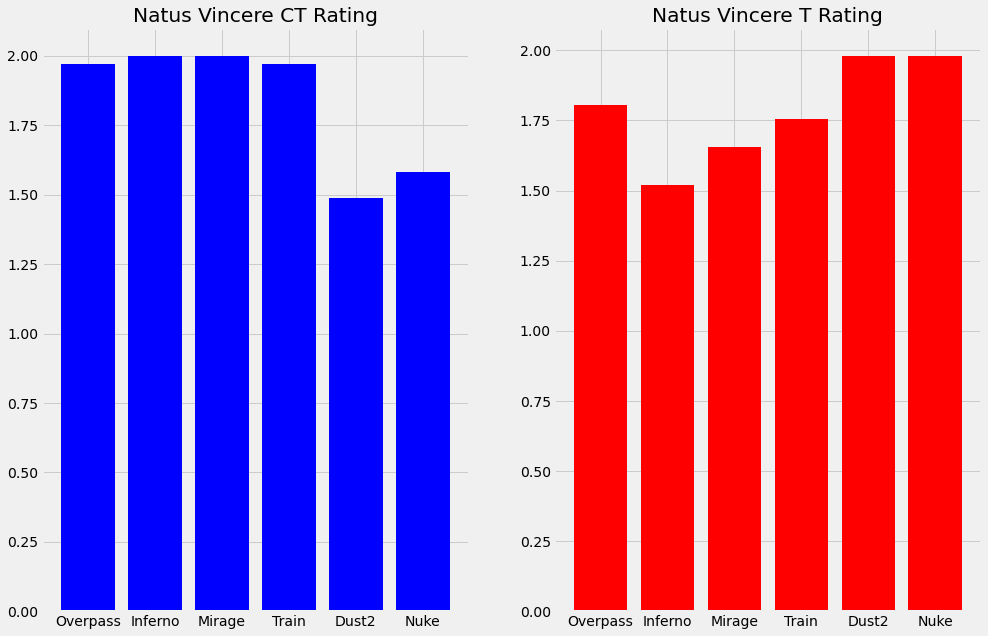

In [76]:
navi_df = new_df.loc[new_df['Team'] == 'Natus Vincere']
navi_df = navi_df.loc[navi_df['MapWinner'] == 'Natus Vincere']
navi_df.reset_index(drop = True)
fig, (ax1, ax2) = plt.subplots(1,2,sharex = True, figsize = (15,10))
ax1.bar(x = navi_df['Map'],height = navi_df['Average_CT_Rating'], color = 'blue')
ax2.bar(x = navi_df['Map'],height = navi_df['Average_T_Rating'], color = 'red')

ax1.title.set_text('Natus Vincere CT Rating')
ax2.title.set_text('Natus Vincere T Rating')

For each map that a team won, the central trend of mean is analyzed.It is observed that a team like Natus Vincere has a much lower average CT rating across its players when playing Dust2. However, its T side rating is still quite high, this means their players are more suited to an offensive minded gameset. In the Cloud9 plot, we see that the omission of certain maps means they simply did not play and win those maps. For example, the map "Nuke" is ommitted from x-axis; that means the groupby function did not catch it. 

### For the following plot, we see a head-head between our top teams, their wins and losses on various maps. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

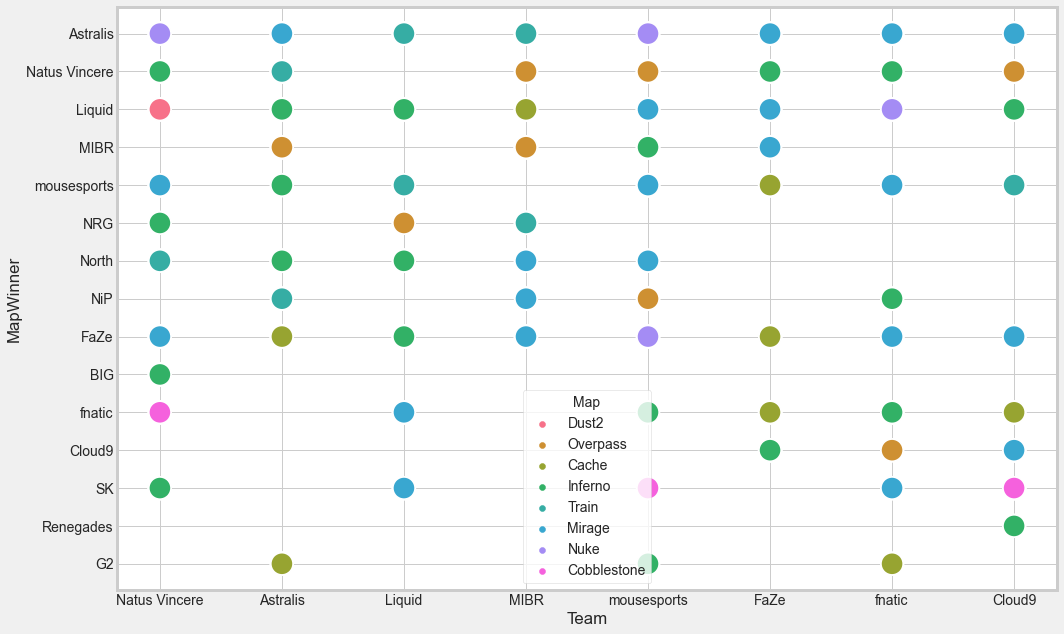

In [77]:
plt.figure(figsize=(15,10,))
sns.set_style("whitegrid")
temp_plt = sns.scatterplot(x='Team', y='MapWinner', hue='Map', data=new_df,s = 500)

Based on the scatter plot, we see that Astralis has not lost a single map to Cloud9 in 2018.

#### In the final section, linear regression models are developed to predict the future trajectory of a team. A team with a high CT-side rating and high T-side rating is the goal for all teams in this dataset. Each player is represented by a unique colour and the player performances of each of the top teams are plotted below.



In [78]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<IPython.core.display.Javascript object>

Our coefficient for Astralis is [[0.01554894]]
Mean squared error: 0.07


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

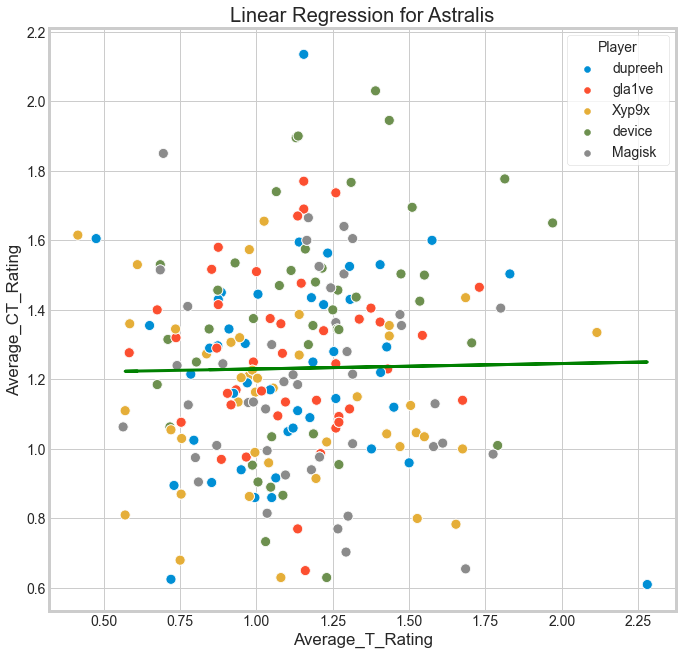

<IPython.core.display.Javascript object>

Our coefficient for Cloud9 is [[0.13429329]]
Mean squared error: 0.09


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

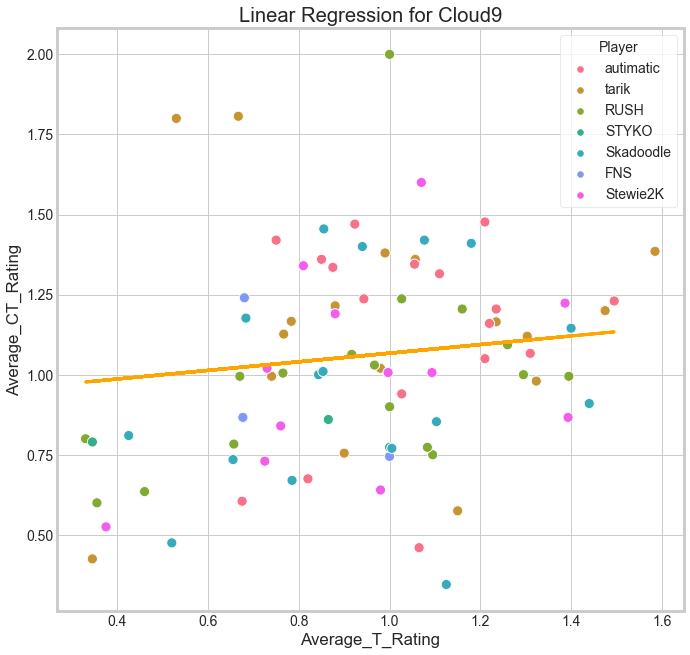

<IPython.core.display.Javascript object>

Our coefficient for FaZe is [[0.23803813]]
Mean squared error: 0.11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

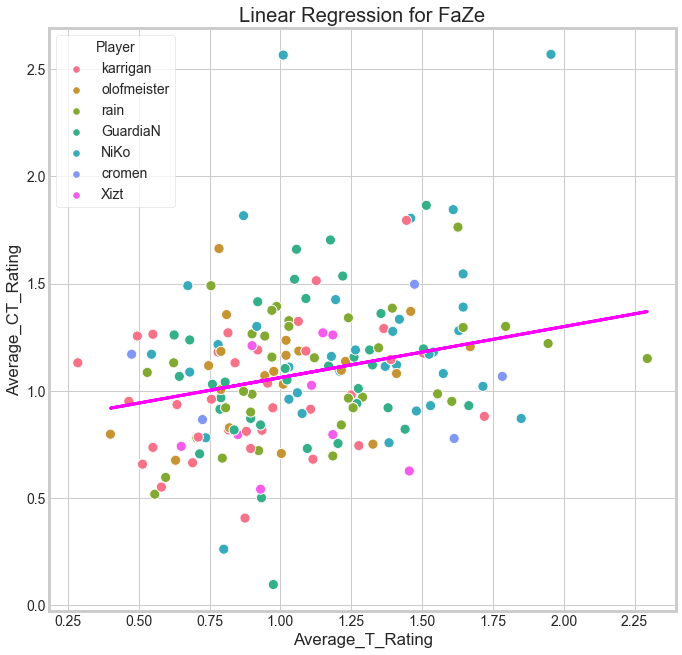

<IPython.core.display.Javascript object>

Our coefficient for Liquid is [[0.268729]]
Mean squared error: 0.07


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

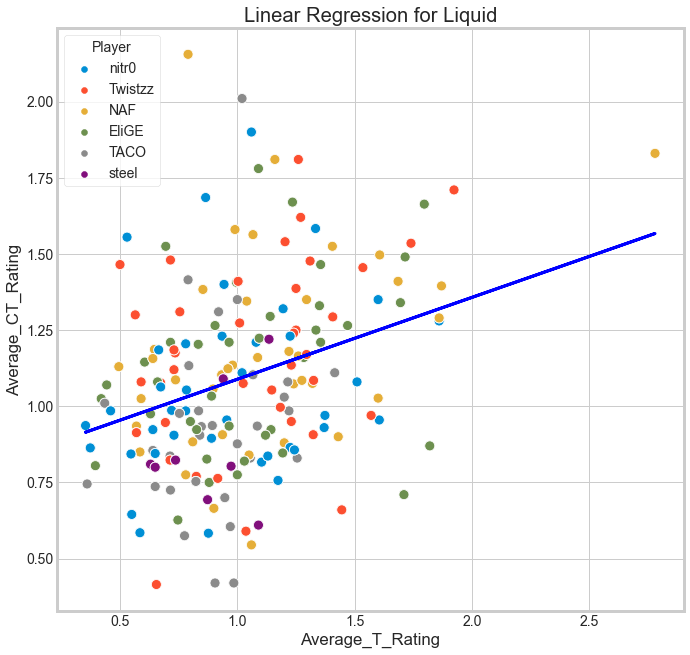

<IPython.core.display.Javascript object>

Our coefficient for MIBR is [[-0.02567169]]
Mean squared error: 0.08


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

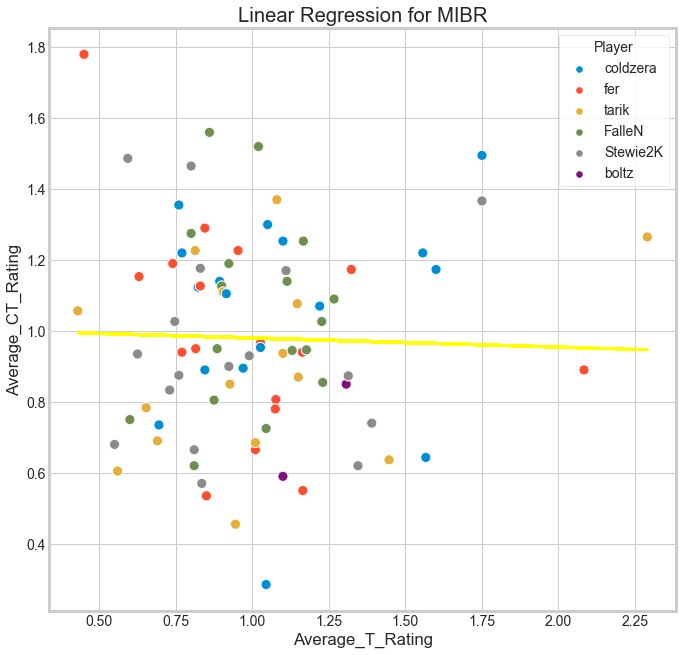

<IPython.core.display.Javascript object>

Our coefficient for Natus Vincere is [[0.39103386]]
Mean squared error: 0.09


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

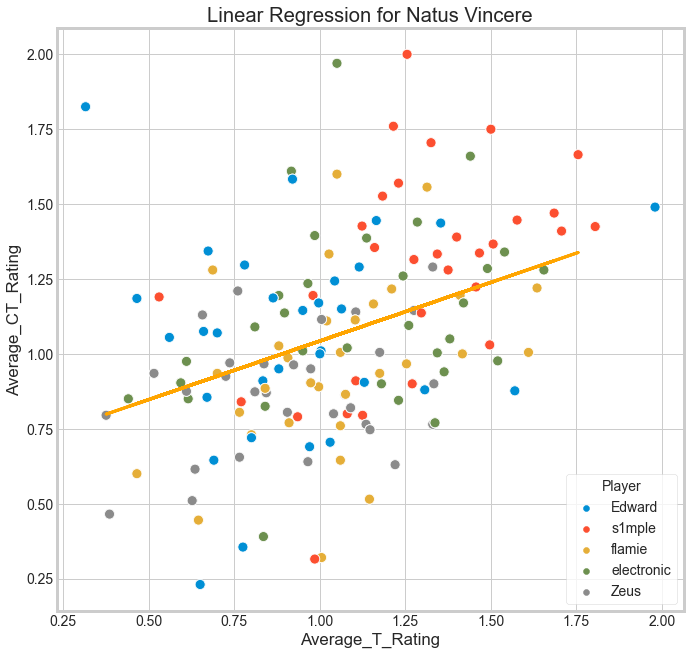

<IPython.core.display.Javascript object>

Our coefficient for fnatic is [[0.12239861]]
Mean squared error: 0.05


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

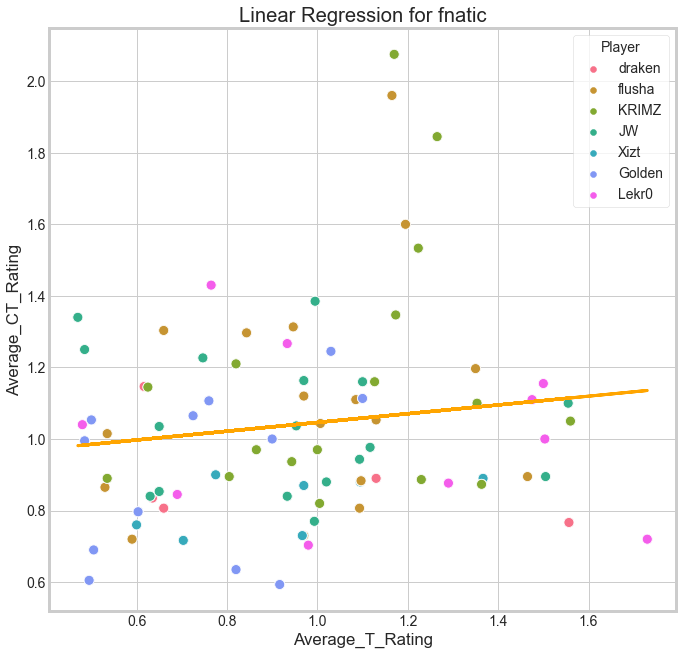

<IPython.core.display.Javascript object>

Our coefficient for mousesports is [[0.15421181]]
Mean squared error: 0.10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

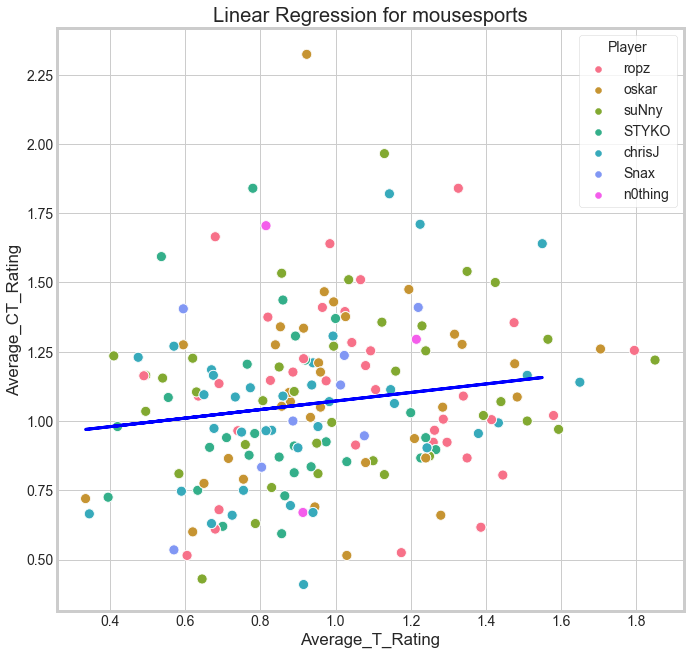

In [79]:
# Creating a linear model by Team. 
for p_type, df in new_df.groupby('Team'):
    # Grab data grouped by Team. 
    sub_X = [[x] for x in df['Average_T_Rating'].values]
    sub_Xvals = [[x] for x in df['Average_CT_Rating'].values]
    # Graphing data. 
    plt.figure(figsize=(10,10,))
    sns.scatterplot(x='Average_T_Rating', y='Average_CT_Rating', s = 100, hue = 'Player', data= new_df.loc[new_df['Team'].isin([p_type])])
    
    # Split up data using a 2/3 training set and a 1/3 test set. 
    x_train, x_test, y_train, y_test = train_test_split(sub_X, sub_Xvals, test_size=0.33, random_state=23)
    sub_lm= LinearRegression().fit(x_train, y_train)
    
    # Creating a linear regression model for each team and plotting it. 
    prediction = sub_lm.predict(x_test)
    print("Our coefficient for", p_type, "is", sub_lm.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))
    if(p_type=='Astralis'):
        plt.plot(x_test, prediction, linewidth=3,color = 'green', label = p_type)
    if(p_type=='Cloud9'):
        plt.plot(x_test, prediction, linewidth=3,color = 'orange', label = p_type)
    if(p_type=='SK'):
        plt.plot(x_test, prediction, linewidth=3,color = 'red', label = p_type)
    if(p_type=='FaZe'):
        plt.plot(x_test, prediction, linewidth=3,color = 'magenta', label = p_type)
    if(p_type=='G2'):
        plt.plot(x_test, prediction, linewidth=3,color = 'green', label = p_type)
    if(p_type=='Liquid'):
        plt.plot(x_test, prediction, linewidth=3,color = 'blue', label = p_type)
    if(p_type=='MIBR'):
        plt.plot(x_test, prediction, linewidth=3,color = 'yellow', label = p_type)
    if(p_type=='Natus Vincere'):
        plt.plot(x_test, prediction, linewidth=3,color = 'orange', label = p_type)
    if(p_type=='mousesports'):
        plt.plot(x_test, prediction, linewidth=3,color = 'blue', label = p_type)
    if(p_type=='fnatic'):
        plt.plot(x_test, prediction, linewidth=3,color = 'orange', label = p_type)
    plt.title('Linear Regression for ' + p_type)
    plt.show()

From the lines draw we can observe the performance of a team given the current performance of the players. This should help predict a team's trajectory to see if they should make roster changes or not. A player's performance can be compared with that of his teammates.

### Conclusion/Final Thoughts

We find that when players have stronger T-side rating, they'll also increase their CT-side rating. This could be mean players that have more aggressive playstyles can better translate that success over when they play the defensive side. One thing to consider on our model is if a team is very well balanced, then the data should cluster around the linear regression line. If a team has a superstar carry player this could drastically affect the result; there might not be enough opportunities left for the remaining teammates to have as much impact. Moving forward, more attention should be paid to the specific maps and a players impact per map rather than series. This could reveal the bias of a player to performing well for certain maps versus others.